In [1]:
!which python

/storage/home/itamarreis/.conda/envs/olives/bin/python


# Noise in the labels

In [7]:
import matplotlib.pyplot as plt
import numpy
%matplotlib notebook

<IPython.core.display.Javascript object>


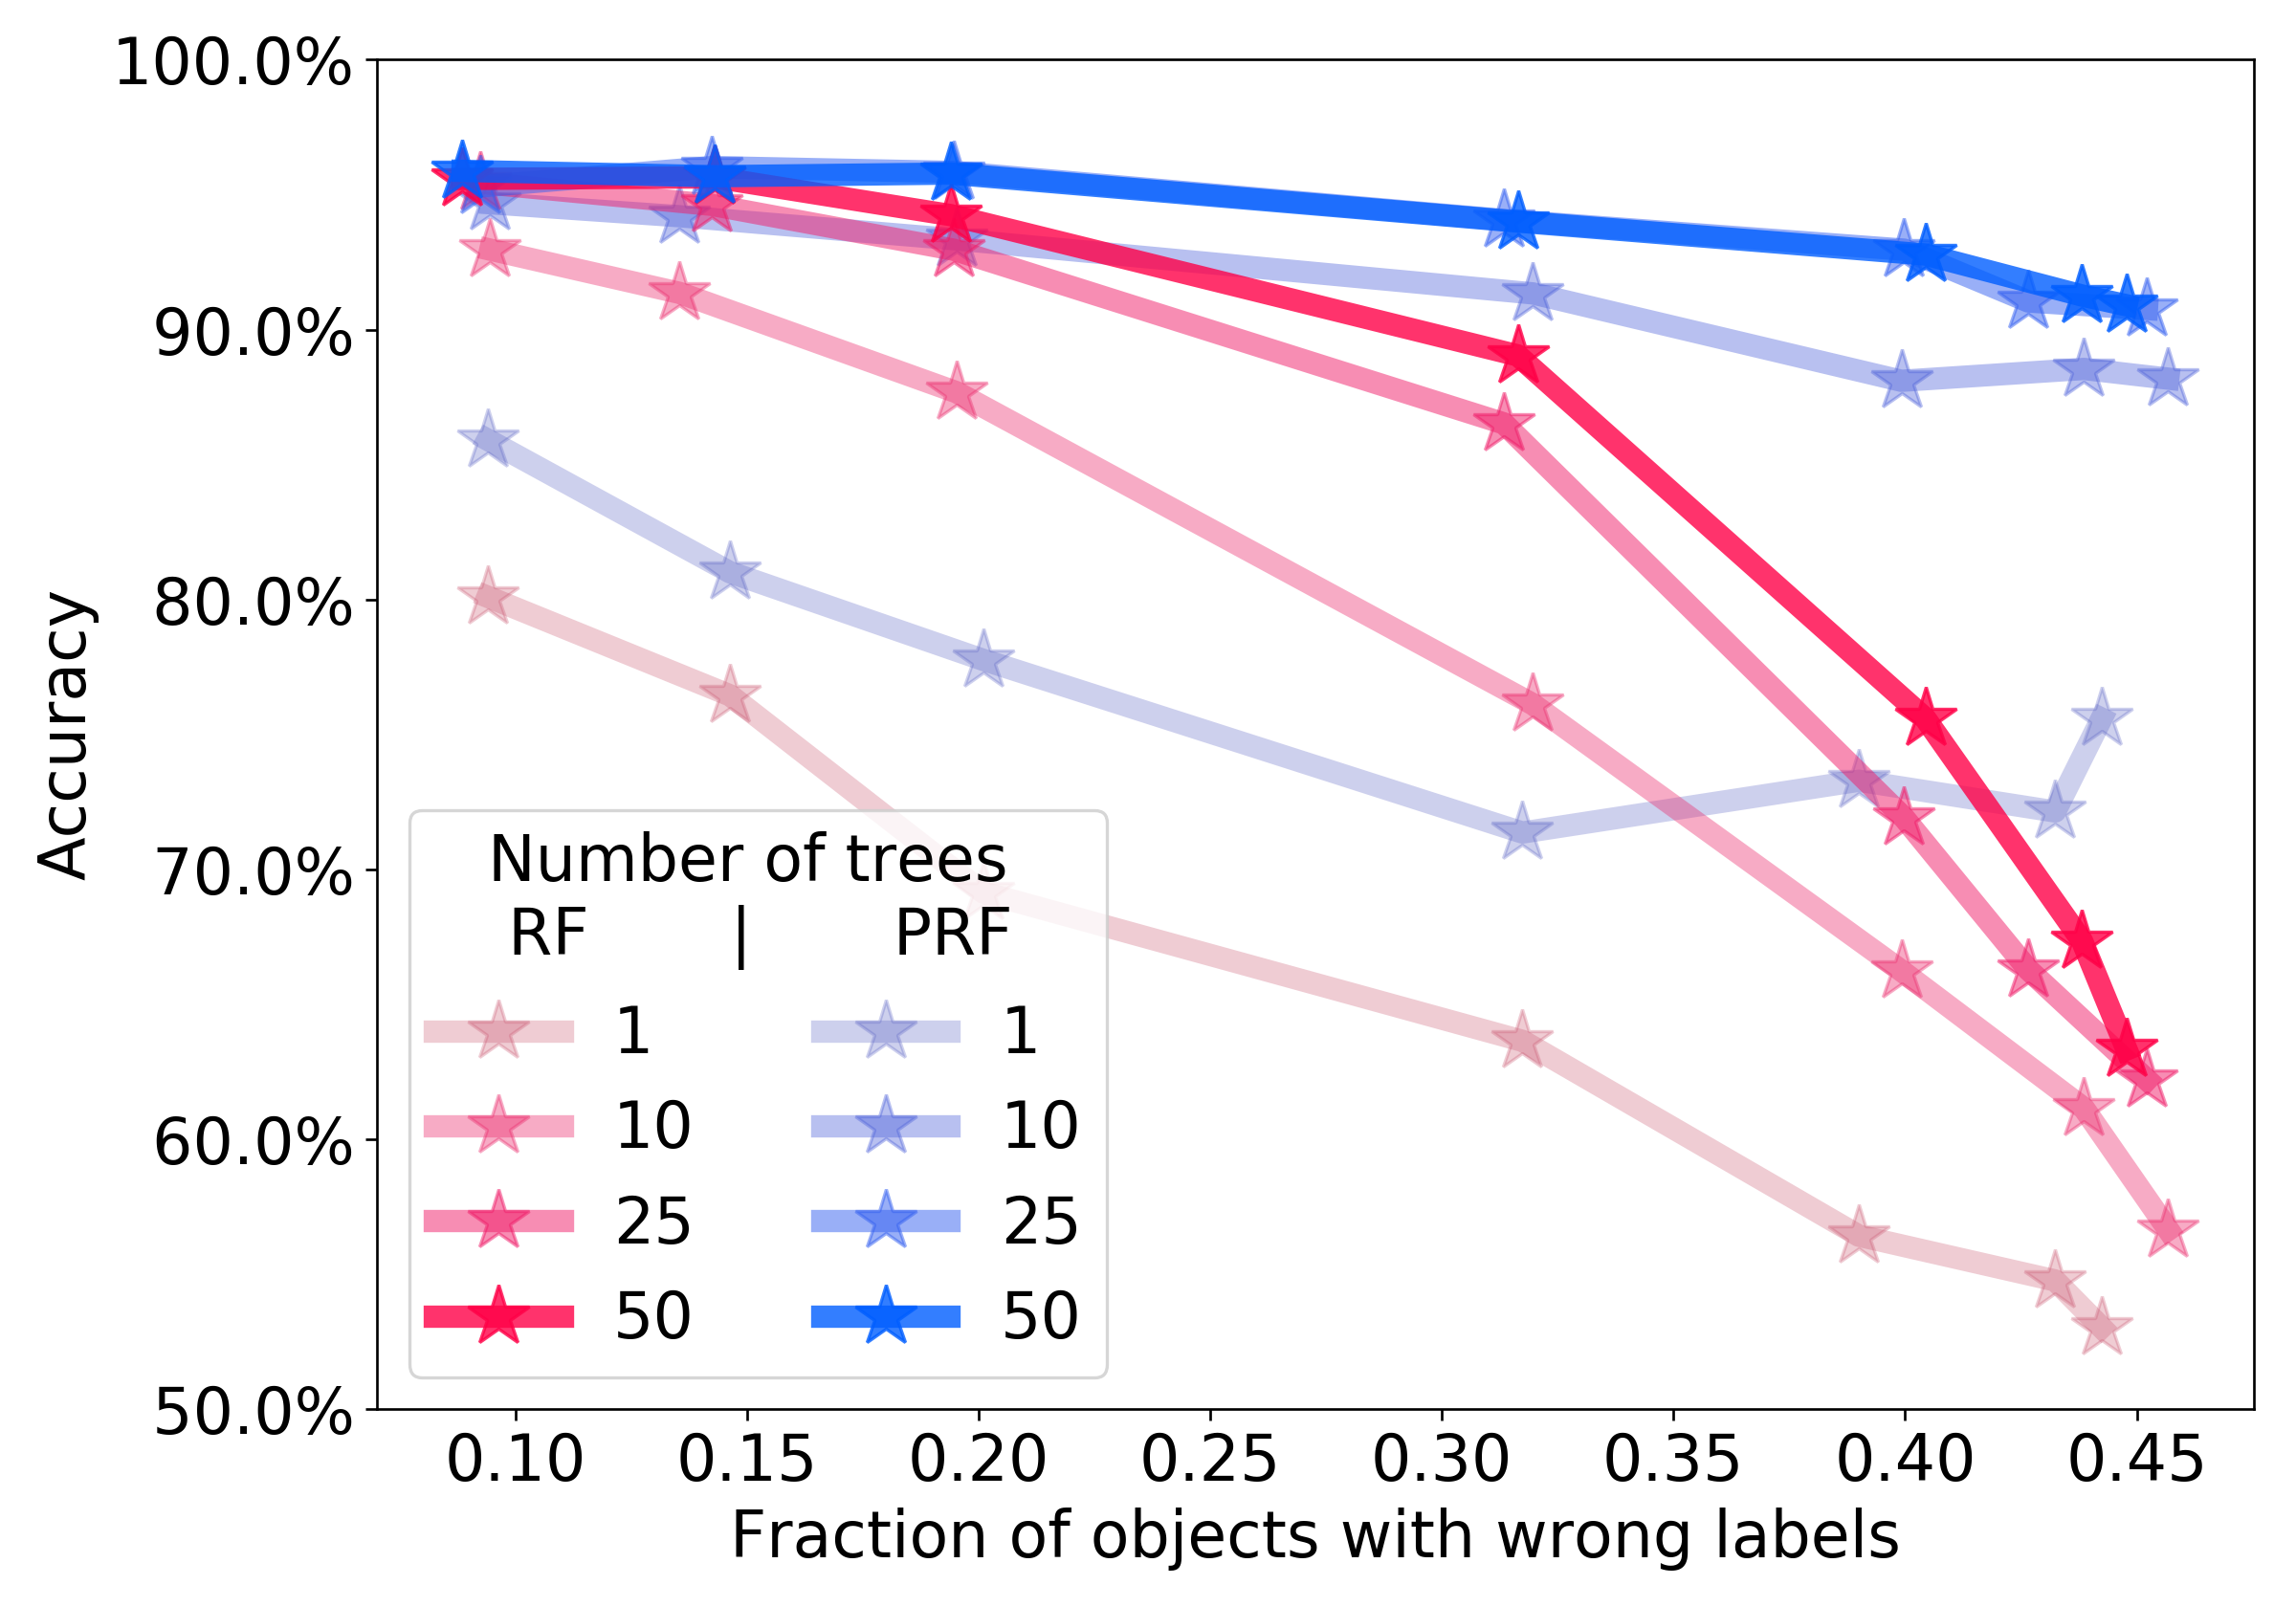

In [116]:
lw = 7
ms = 20
plt.figure(figsize = (10,7))
colors_1 = ['#ca5670', '#eb2f6f', '#f01c69', '#ff0047']
colors_2 = ['#5c64c5', '#4e62da', '#3460f1', '#005eff']



alpha_arr = [ 0.3, 0.4, 0.5, 0.8]

n_tress_vec = [1, 10, 25, 50]
for idx, n_trees in enumerate(n_tress_vec):
    path = 'results/paper/noise_in_labels/n_trees_' + str(n_trees) +'.npy'
    [scores_PRF, scores_RF, fgo_] = numpy.load(path)
    fbo_ = 1 - numpy.array(fgo_)
    
    plt.plot(fbo_, scores_RF, label =  str(n_trees), linewidth = lw, 
             alpha = alpha_arr[idx], color = colors_1[idx],  marker='*', markersize = ms)

    plt.plot(fbo_, scores_PRF, label =  str(n_trees), linewidth = lw, 
             alpha = alpha_arr[idx], color = colors_2[idx],  marker='*', markersize = ms)

    
#plt.plot(fbo, our_score, label = 'WRF', linewidth = lw, alpha = 0.8)
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
handles = numpy.concatenate([handles[::2], handles[1::2]])
labels = numpy.concatenate([labels[::2], labels[1::2]])
legend = plt.legend(handles, labels, fontsize = 20, title = 'Number of trees \n RF       |       PRF',ncol=2,)
plt.setp(legend.get_title(),fontsize='20')

#legend_ = plt.legend(handles[::2], labels[::2],fontsize = 20,loc =4)
#plt.gca().add_artist(legend_)
#plt.legend(handles[1::2], labels[1::2],fontsize = 20,title='PRF')

plt.ylabel('Accuracy', fontsize = 20)
plt.xlabel('Fraction of objects with wrong labels', fontsize = 20)
plt.xticks(fontsize = 20)
yticks = plt.gca().get_yticks()
yticks_p = ['{:>5}%'.format('%.1f' % (yt*100)) for yt in yticks]
plt.yticks(yticks, yticks_p, fontsize = 20)
#plt.title('Noise in lables', fontsize = 15)

plt.tight_layout()
plt.show()

# Noise in the features  - white noise

<IPython.core.display.Javascript object>


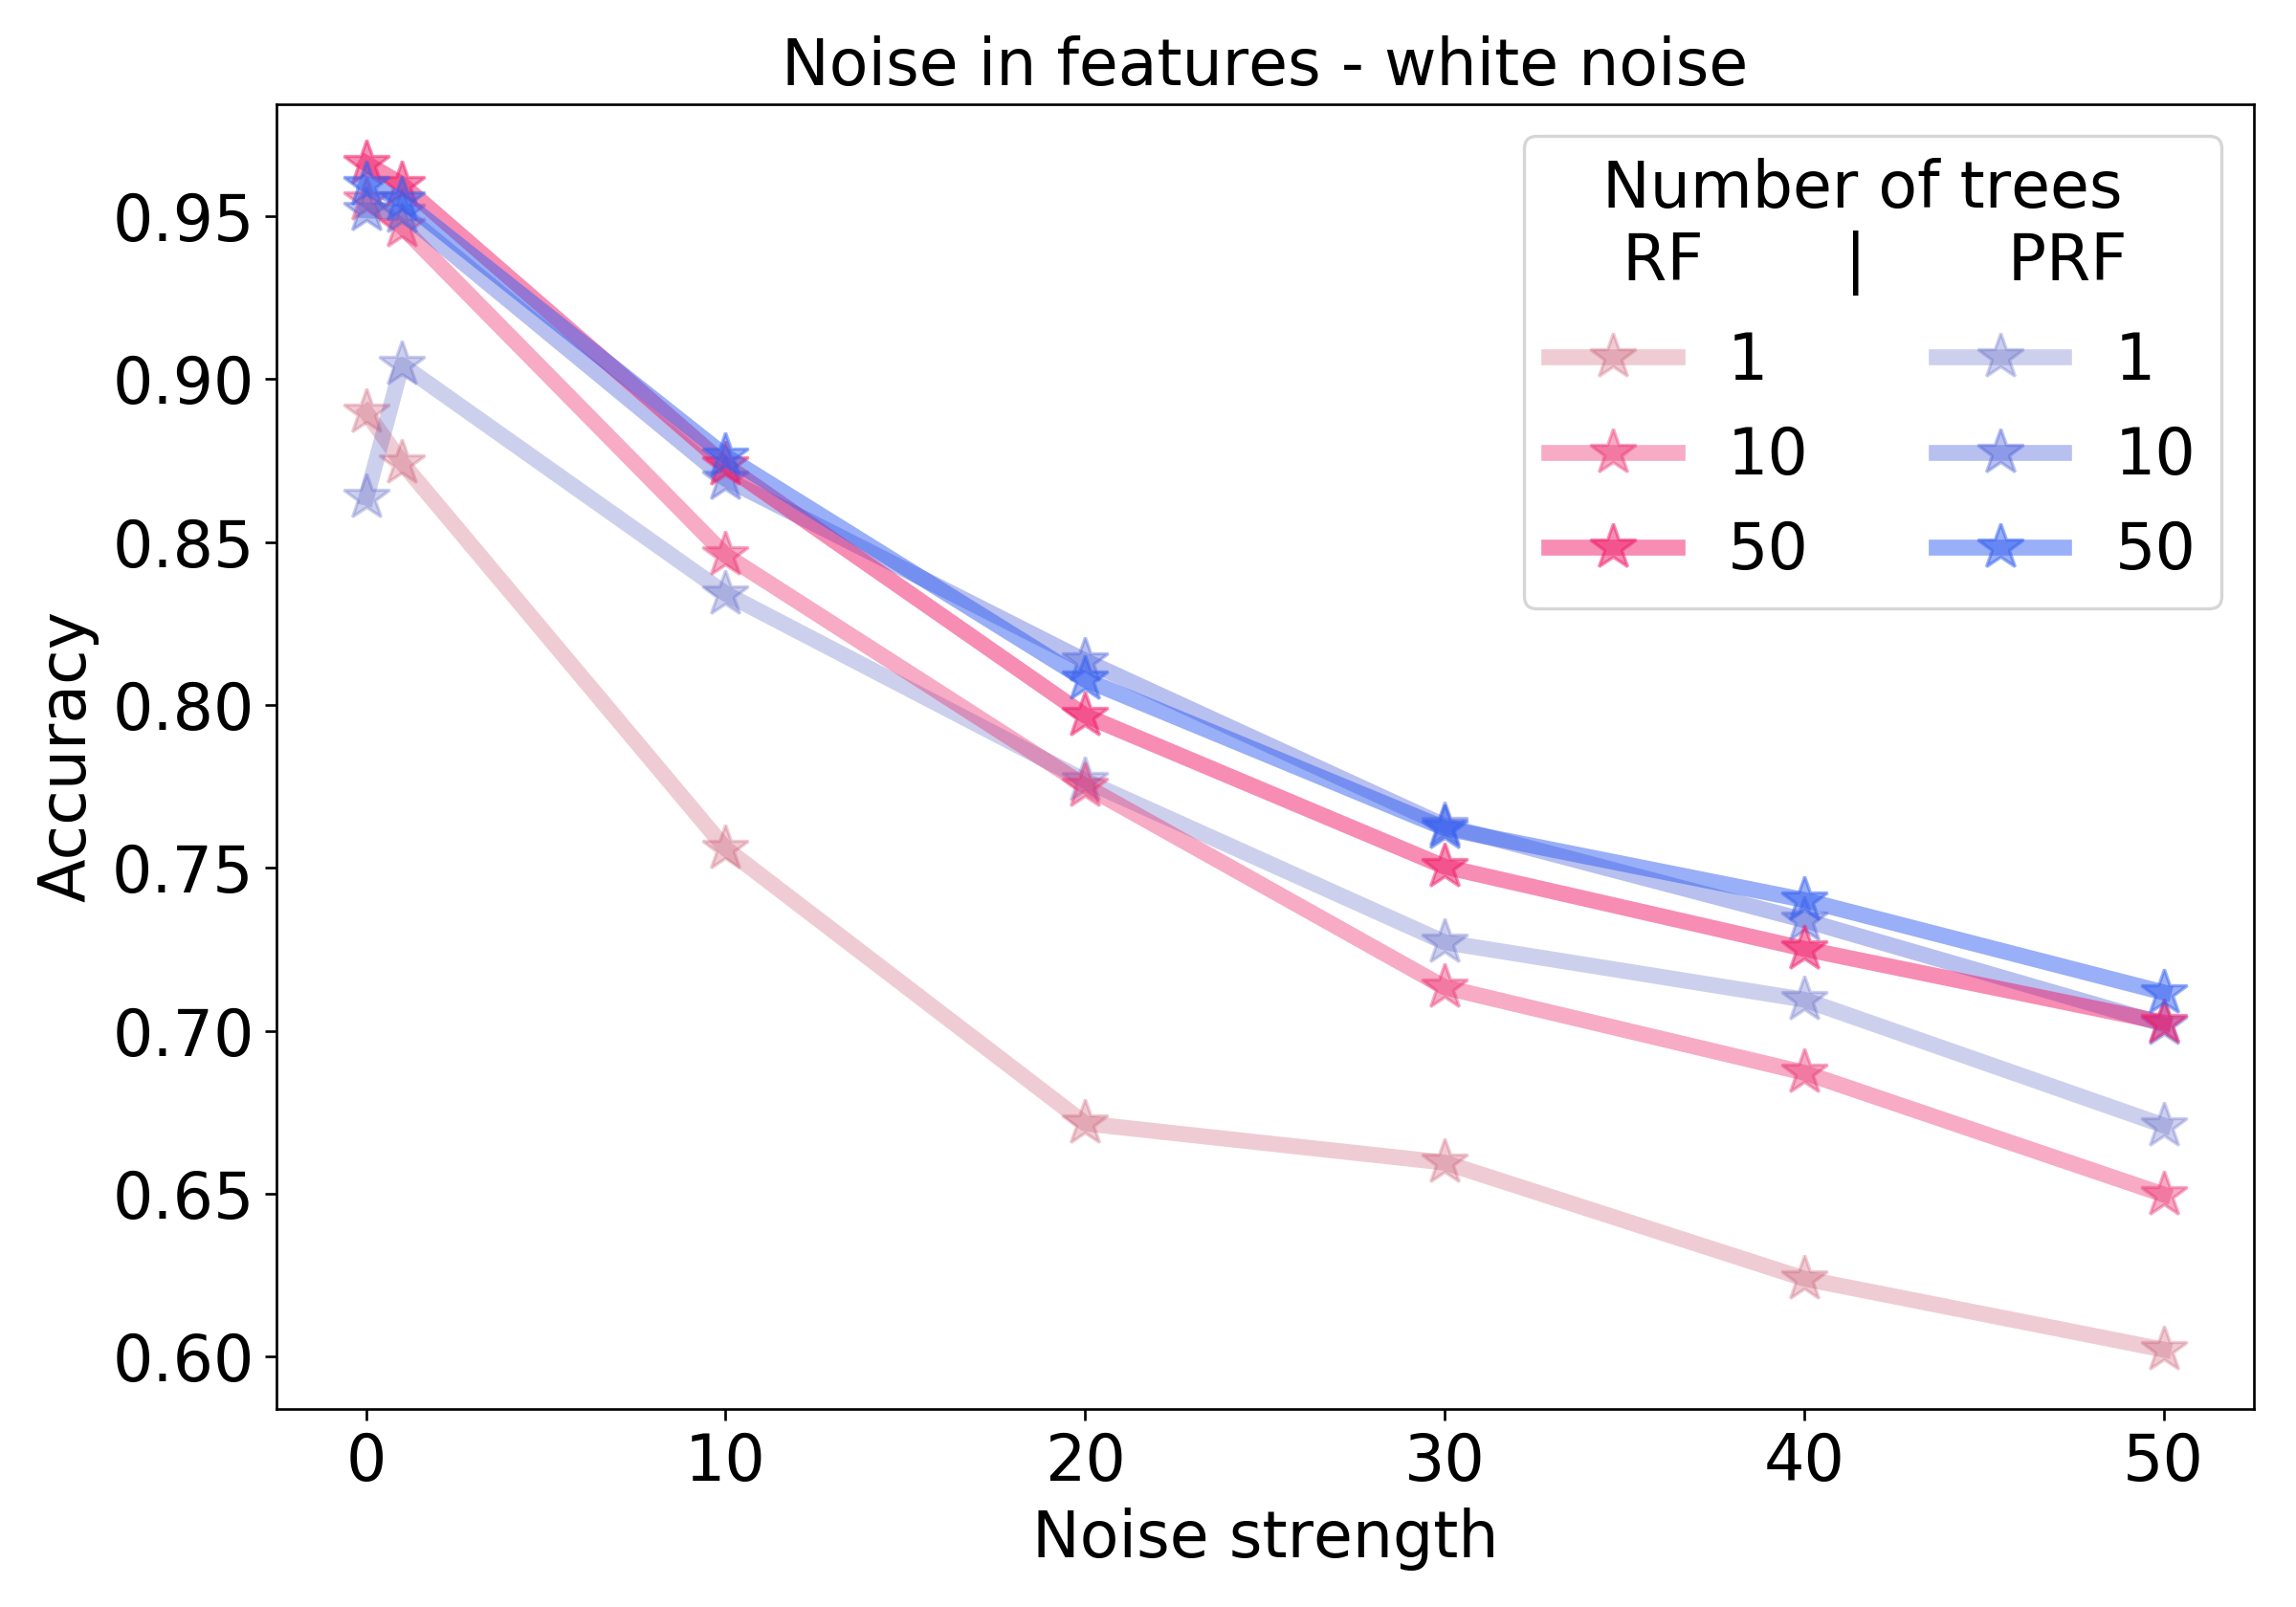

In [44]:
lw = 5
ms = 15
plt.figure(figsize = (10,7))
colors_1 = ['#ca5670', '#eb2f6f', '#f01c69', '#ff0047']
colors_2 = ['#5c64c5', '#4e62da', '#3460f1', '#005eff']



alpha_arr = [ 0.3, 0.4, 0.5, 0.8]

n_tress_vec = [1, 10,  50]
for idx, n_trees in enumerate(n_tress_vec):
    path = 'results/paper/noise_in_features_RR/n_trees_' + str(n_trees) +'.npy'
    [scores_PRF, scores_RF, noise_in_features_vec] = numpy.load(path)
    
    plt.plot(noise_in_features_vec, scores_RF, label =  str(n_trees), linewidth = lw, 
             alpha = alpha_arr[idx], color = colors_1[idx],  marker='*', markersize = ms)

    plt.plot(noise_in_features_vec, scores_PRF, label =  str(n_trees), linewidth = lw, 
             alpha = alpha_arr[idx], color = colors_2[idx],  marker='*', markersize = ms)

    
#plt.plot(fbo, our_score, label = 'WRF', linewidth = lw, alpha = 0.8)
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
handles = numpy.concatenate([handles[::2], handles[1::2]])
labels = numpy.concatenate([labels[::2], labels[1::2]])
legend = plt.legend(handles, labels, fontsize = 20, title = 'Number of trees \n RF       |       PRF',ncol=2,)
plt.setp(legend.get_title(),fontsize='20')

#legend_ = plt.legend(handles[::2], labels[::2],fontsize = 20,loc =4)
#plt.gca().add_artist(legend_)
#plt.legend(handles[1::2], labels[1::2],fontsize = 20,title='PRF')

plt.ylabel('Accuracy', fontsize = 20)
plt.xlabel('Noise strength', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Noise in features - white noise', fontsize = 20)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


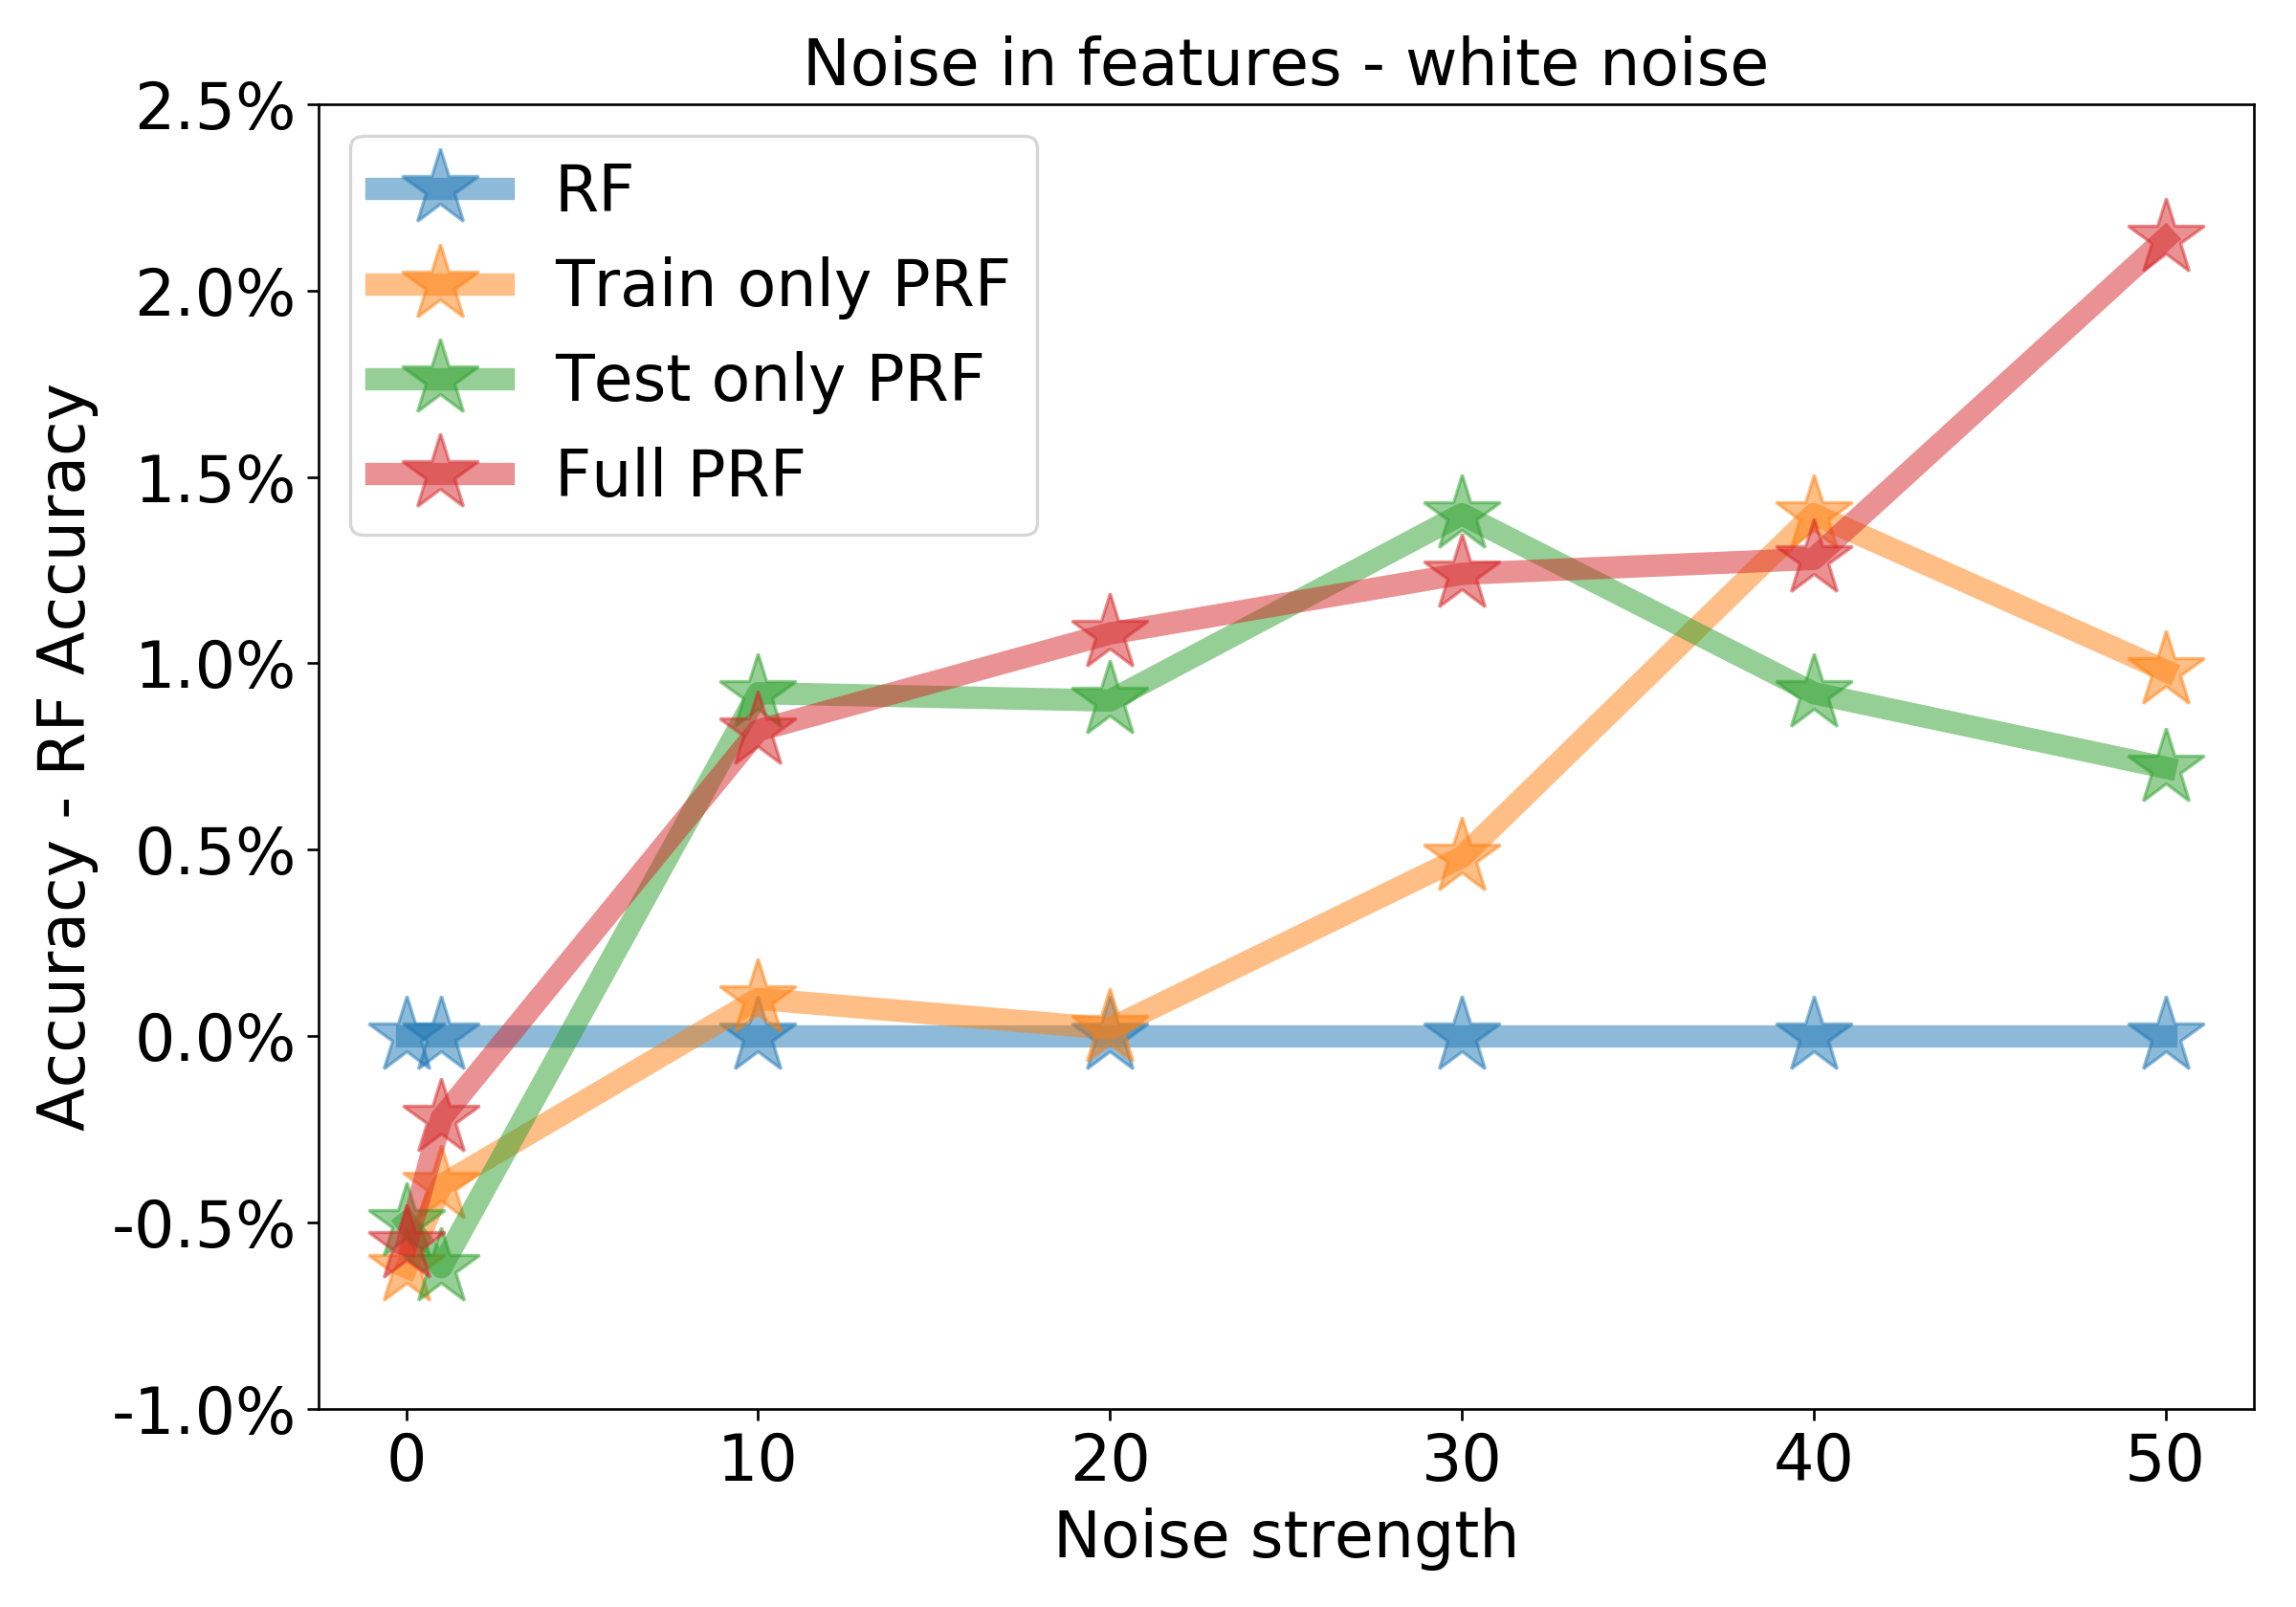

In [63]:
plt.figure(figsize = (10,7))
lw = 7
alpha = 0.5
ms = 25
path = 'results/paper/noise_in_features_RR/train_only_test_only_n_trees50.npy'  
[scores_PRF, scores_RF, scores_PRF_train_only, scores_PRF_test_only, noise_in_features_vec] = numpy.load(path)
plt.plot(noise_in_features_vec, scores_RF-scores_RF, lw = lw, alpha = alpha, label = 'RF', marker='*', markersize = ms)
plt.plot(noise_in_features_vec, scores_PRF_train_only-scores_RF, lw = lw, alpha = alpha, label = 'Train only PRF', marker='*', markersize = ms)
plt.plot(noise_in_features_vec, scores_PRF_test_only-scores_RF, lw = lw, alpha = alpha, label = 'Test only PRF', marker='*', markersize = ms)
plt.plot(noise_in_features_vec, scores_PRF-scores_RF, lw = lw, alpha = alpha, label = 'Full PRF', marker='*', markersize = ms)

plt.legend(fontsize = 20)
plt.xlabel('Noise strength', fontsize = 20)

plt.ylabel('Accuracy - RF Accuracy', fontsize = 20)
#plt.ylim([0.80,0.97])
#plt.xscale('log')
plt.xticks(fontsize = 20)
yticks = plt.gca().get_yticks()
yticks_p = ['{}%'.format('%.1f' % (yt*100)) for yt in yticks]
plt.yticks(yticks, yticks_p, fontsize = 20)
plt.title('Noise in features - white noise', fontsize = 20)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


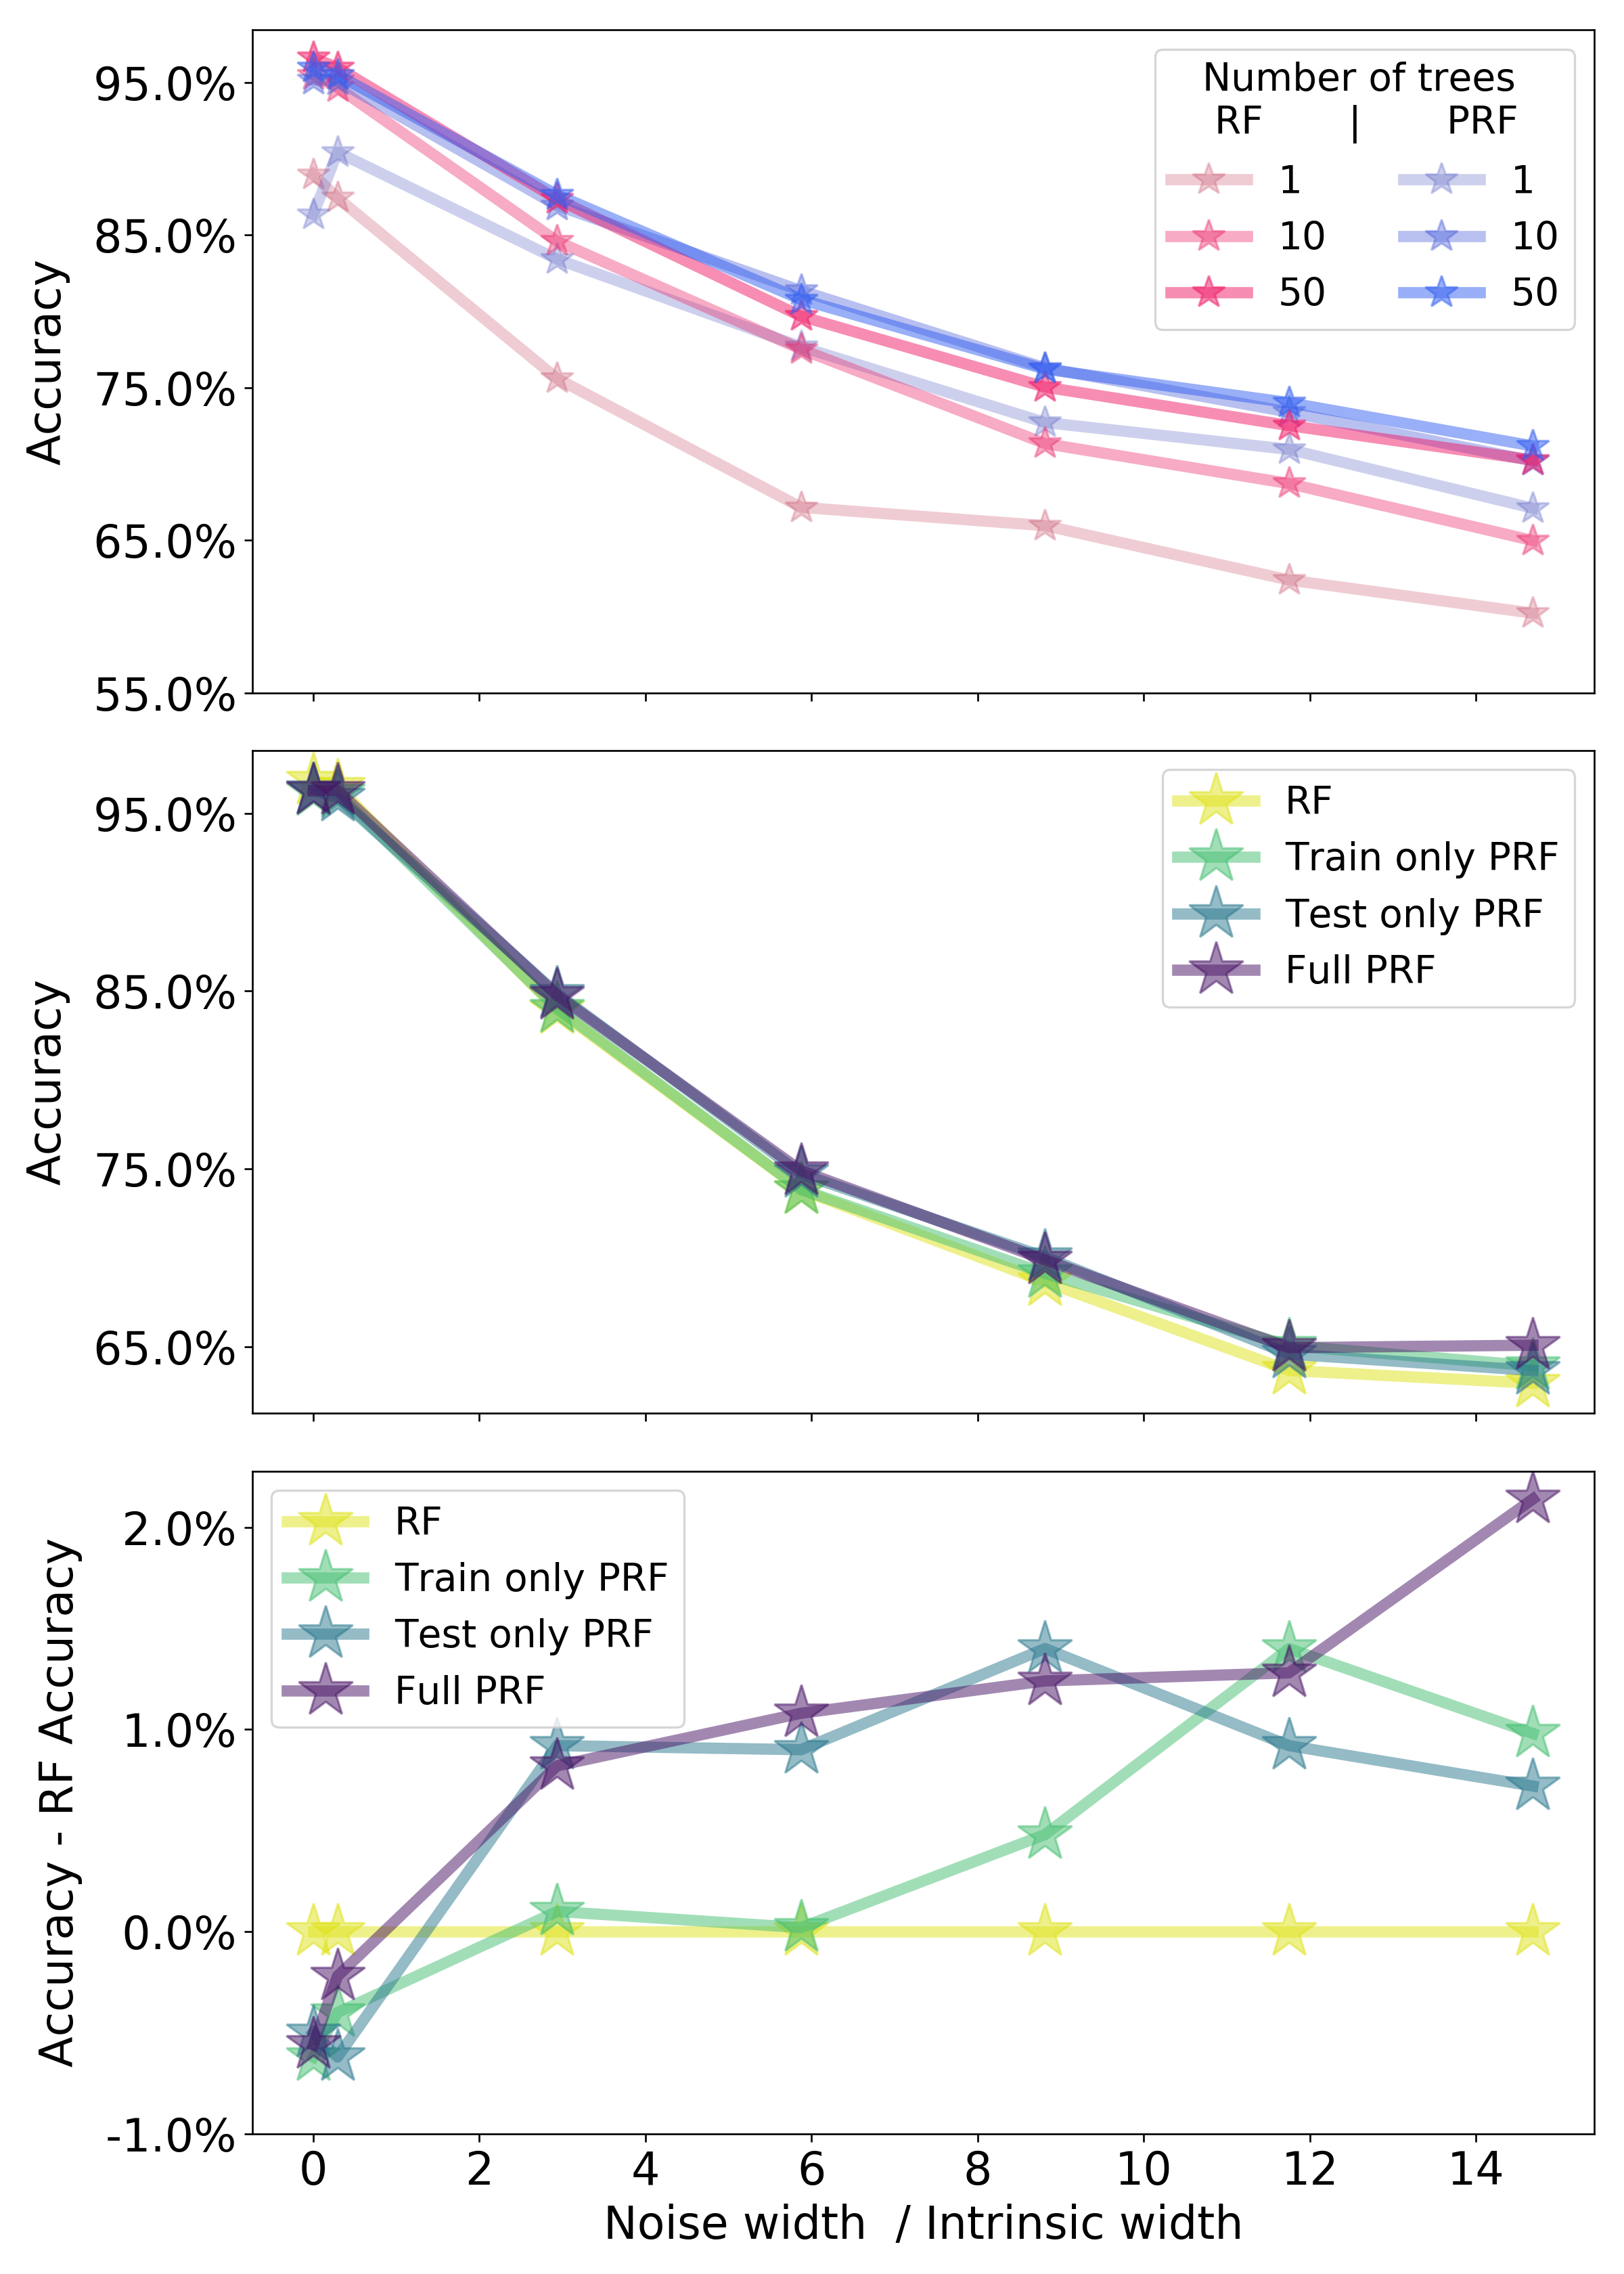

In [227]:
fig = plt.figure(figsize = (10,14))

lw = 5
ms = 15

colors_1 = ['#ca5670', '#eb2f6f', '#f01c69', '#ff0047']
colors_2 = ['#5c64c5', '#4e62da', '#3460f1', '#005eff']
legened_fontsize = 17
#############################################################################################
#############################################################################################
ax0 = plt.subplot(3, 1, 1)
#############################################################################################
#############################################################################################

alpha_arr = [ 0.3, 0.4, 0.5, 0.8]

n_tress_vec = [1, 10,  50]
for idx, n_trees in enumerate(n_tress_vec):
    path = 'results/paper/noise_in_features_RR/n_trees_' + str(n_trees) +'.npy'
    [scores_PRF, scores_RF, noise_in_features_vec] = numpy.load(path)
    
    noise_in_features_vec = noise_in_features_vec*0.2936900553378791   

    plt.plot(noise_in_features_vec, scores_RF, label =  str(n_trees), linewidth = lw, 
             alpha = alpha_arr[idx], color = colors_1[idx],  marker='*', markersize = ms)

    plt.plot(noise_in_features_vec, scores_PRF, label =  str(n_trees), linewidth = lw, 
             alpha = alpha_arr[idx], color = colors_2[idx],  marker='*', markersize = ms)

    
#plt.plot(fbo, our_score, label = 'WRF', linewidth = lw, alpha = 0.8)
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
handles = numpy.concatenate([handles[::2], handles[1::2]])
labels = numpy.concatenate([labels[::2], labels[1::2]])
legend = plt.legend(handles, labels, fontsize = legened_fontsize, title = 'Number of trees \n RF       |       PRF',ncol=2,)
plt.setp(legend.get_title(),fontsize=legened_fontsize)

#legend_ = plt.legend(handles[::2], labels[::2],fontsize = 20,loc =4)
#plt.gca().add_artist(legend_)
#plt.legend(handles[1::2], labels[1::2],fontsize = 20,title='PRF')

plt.ylabel('Accuracy', fontsize = 20)
#plt.xlabel('Noise strength', fontsize = 20)
yticks = plt.gca().get_yticks()[::2]
yticks_p = ['{:>5}%'.format('%.1f' % (yt*100)) for yt in yticks]
plt.yticks(yticks, yticks_p, fontsize = 20)
plt.setp(ax0.get_xticklabels(), visible=False)



#############################################################################################
#############################################################################################
ax1 = plt.subplot(3, 1, 2, sharex=ax0)
#############################################################################################
#############################################################################################
lw = 5
alpha = 0.5
ms = 25
path = 'results/paper/noise_in_features_RR/train_only_test_only_n_trees50.npy'  
[scores_PRF, scores_RF, scores_PRF_train_only, scores_PRF_test_only, noise_in_features_vec] = numpy.load(path)
noise_in_features_vec = noise_in_features_vec*0.2936900553378791
from matplotlib.cm import get_cmap
cmap = get_cmap('viridis_r')
c1 = 0.05
c2 = 0.3
c3 = 0.6
c4 = 0.95

plt.plot(noise_in_features_vec, scores_RF, lw = lw, alpha = alpha, label = 'RF', marker='*', markersize = ms, c = cmap(c1))
plt.plot(noise_in_features_vec, scores_PRF_train_only, lw = lw, alpha = alpha, label = 'Train only PRF', marker='*', markersize = ms, c = cmap(c2))
plt.plot(noise_in_features_vec, scores_PRF_test_only, lw = lw, alpha = alpha, label = 'Test only PRF', marker='*', markersize = ms, c = cmap(c3))
plt.plot(noise_in_features_vec, scores_PRF, lw = lw, alpha = alpha, label = 'Full PRF', marker='*', markersize = ms, c = cmap(c4))
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend(fontsize = legened_fontsize)


plt.ylabel('Accuracy', fontsize = 20)
#plt.ylim([0.80,0.97])
#plt.xscale('log')

yticks = plt.gca().get_yticks()[1::2]
yticks_p = ['{:>5}%'.format('%.1f' % (yt*100)) for yt in yticks]
plt.yticks(yticks, yticks_p, fontsize = 20)

#############################################################################################
#############################################################################################
ax2 = plt.subplot(3, 1, 3, sharex=ax1)
#############################################################################################
#############################################################################################

plt.plot(noise_in_features_vec, scores_RF-scores_RF, lw = lw, alpha = alpha, label = 'RF', marker='*', markersize = ms, c = cmap(c1))
plt.plot(noise_in_features_vec, scores_PRF_train_only-scores_RF, lw = lw, alpha = alpha, label = 'Train only PRF', marker='*', markersize = ms, c = cmap(c2))
plt.plot(noise_in_features_vec, scores_PRF_test_only-scores_RF, lw = lw, alpha = alpha, label = 'Test only PRF', marker='*', markersize = ms, c = cmap(c3))
plt.plot(noise_in_features_vec, scores_PRF-scores_RF, lw = lw, alpha = alpha, label = 'Full PRF', marker='*', markersize = ms, c = cmap(c4))
plt.ylabel('Accuracy - RF Accuracy', fontsize = 20)
plt.legend(fontsize = legened_fontsize)
#plt.ylim([0.80,0.97])
#plt.xscale('log')
yticks = plt.gca().get_yticks()[::2]
yticks_p = ['{:>5}%'.format('%.1f' % (yt*100)) for yt in yticks]
plt.yticks(yticks, yticks_p, fontsize = 20)
plt.xlabel('Noise width  / Intrinsic width', fontsize = 20)
plt.xticks(fontsize = 20)

#fig.suptitle('Noise in features - white noise', fontsize = 20)

plt.tight_layout()
plt.show()

# Noise in the features - groups

In [193]:
scores_RF

array([0.9664, 0.9154, 0.834 , 0.6976, 0.6874, 0.677 ])

<IPython.core.display.Javascript object>


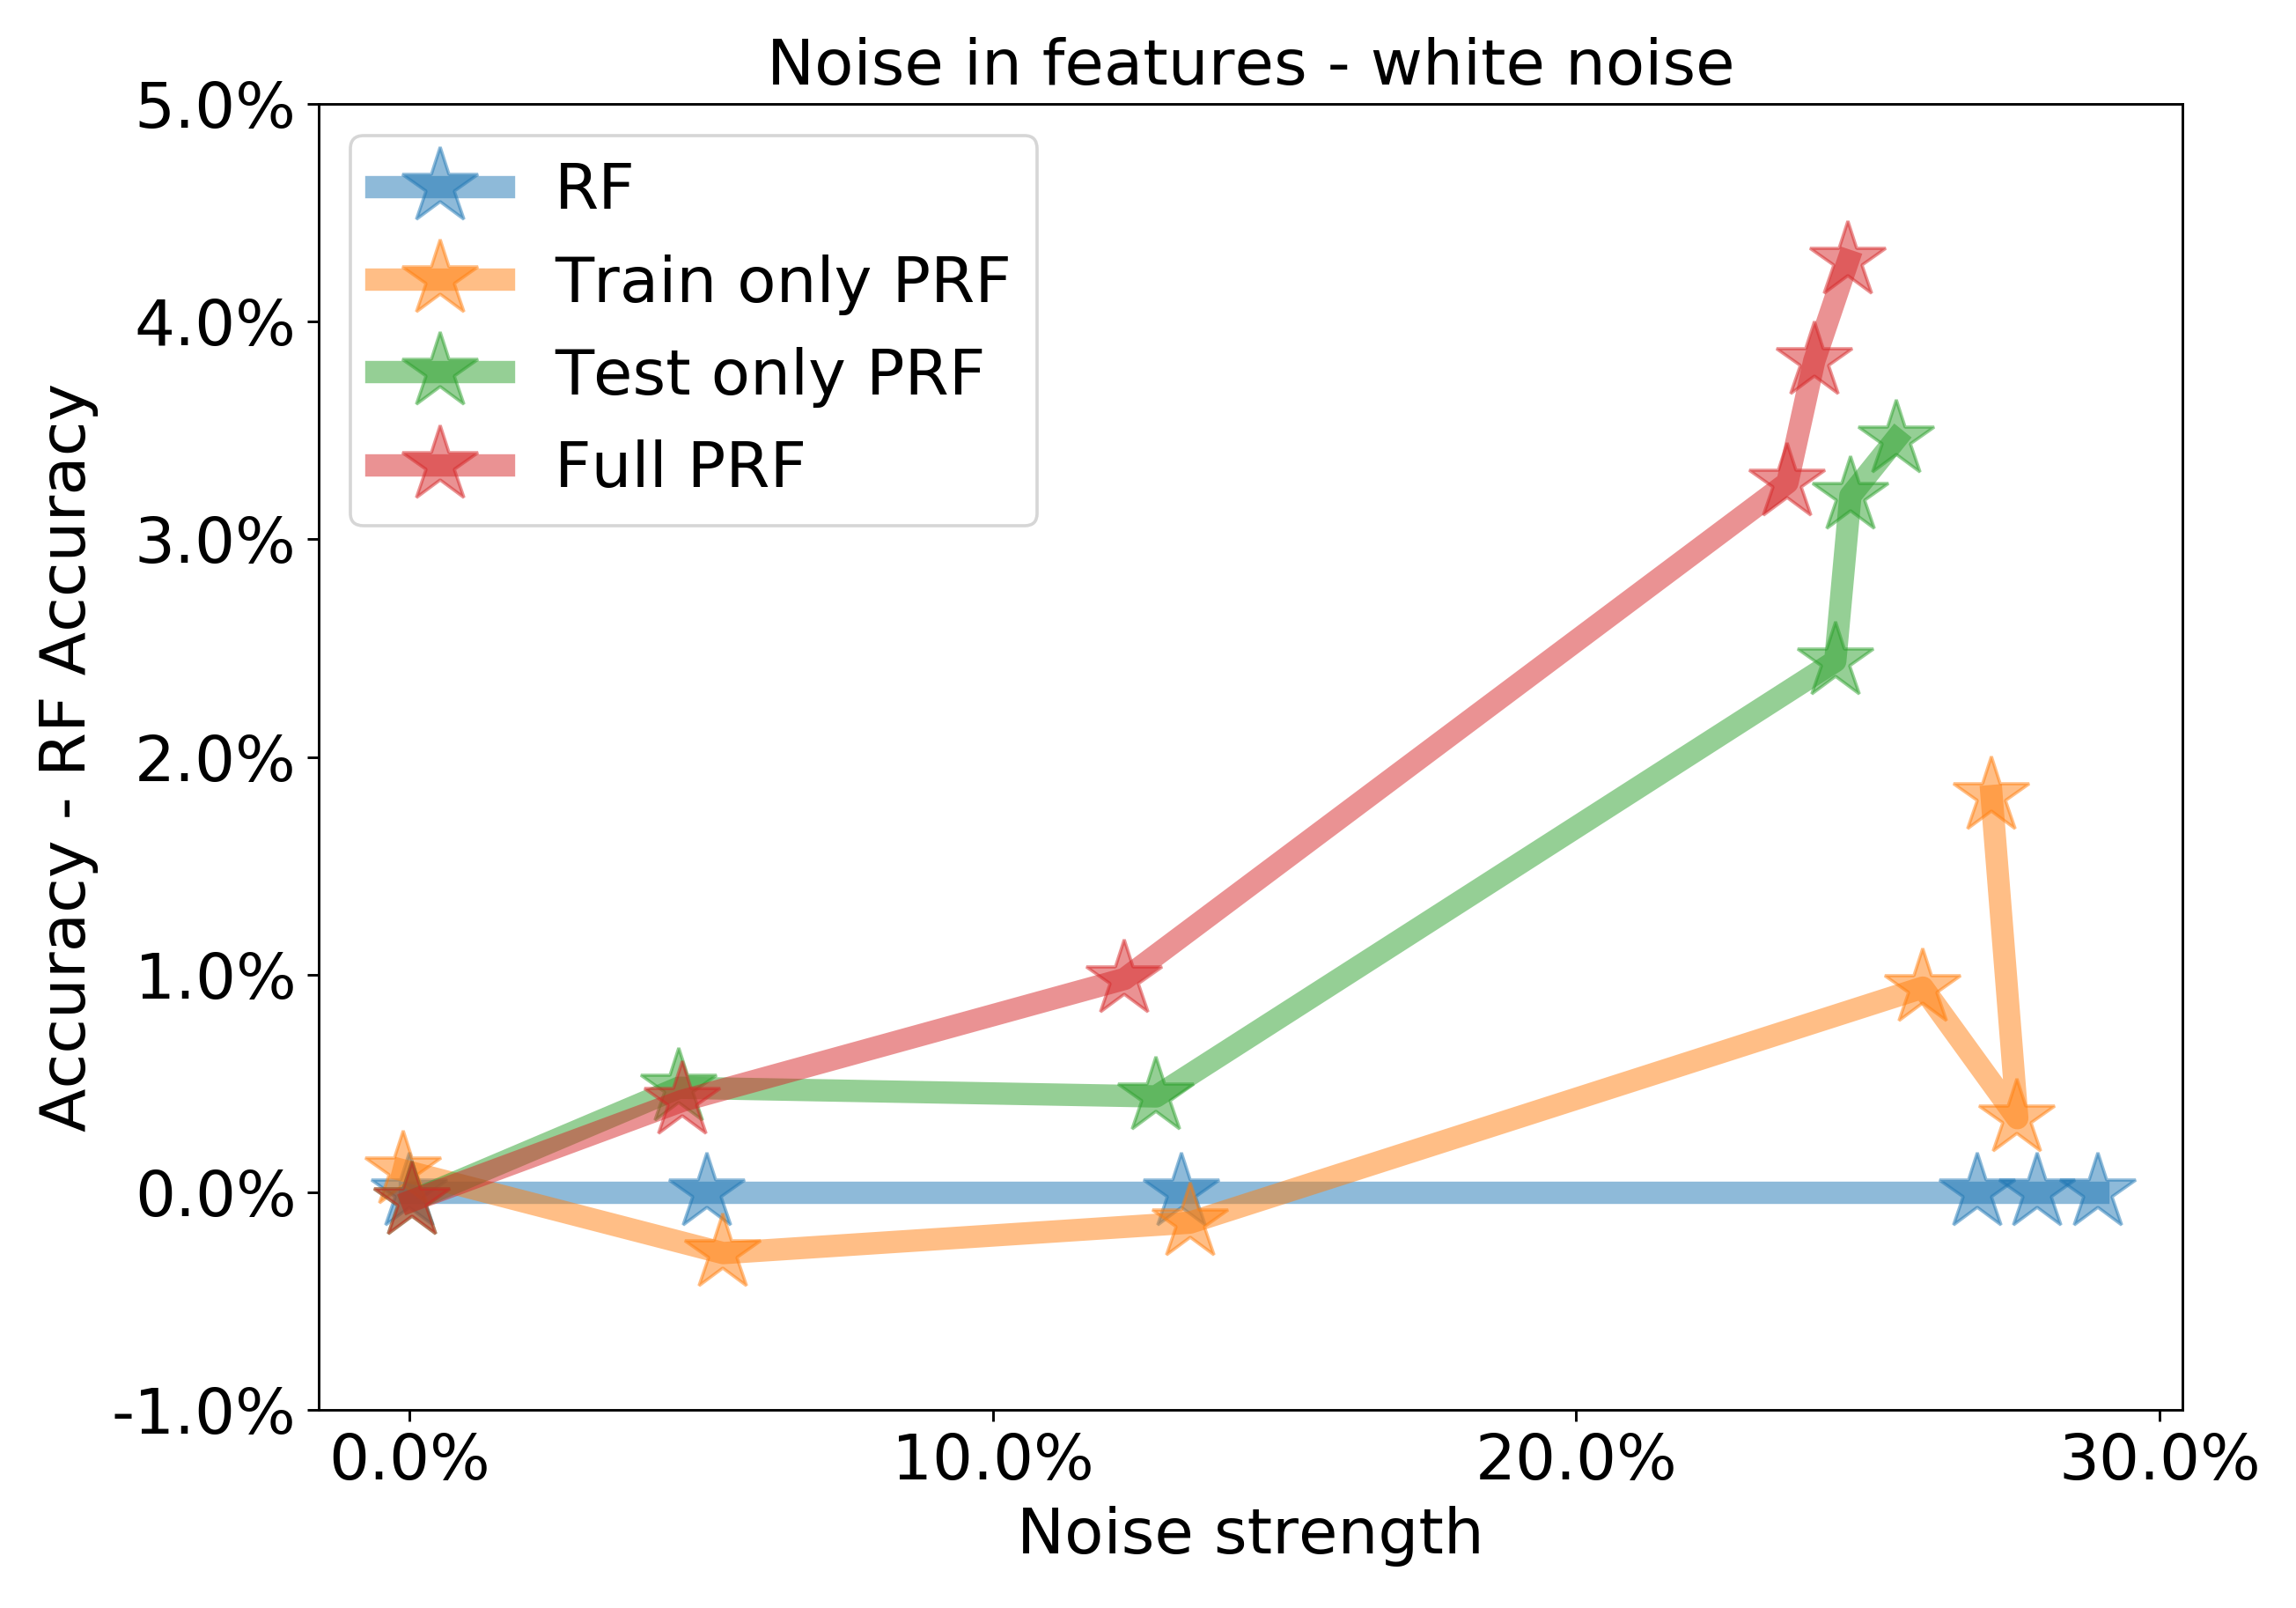

In [198]:
plt.figure(figsize = (10,7))
lw = 7
alpha = 0.5
ms = 25
path = 'results/paper/noise_in_features_G/train_only_test_only_n_trees50_20_groups.npy'  
[scores_PRF, scores_RF, scores_PRF_train_only, scores_PRF_test_only, noise_in_features_vec] = numpy.load(path)

plt.plot(-scores_RF+max(scores_RF), scores_RF-scores_RF, lw = lw, alpha = alpha, label = 'RF', marker='*', markersize = ms)
plt.plot(-scores_PRF_train_only+max(scores_RF), scores_PRF_train_only-scores_RF, lw = lw, alpha = alpha, label = 'Train only PRF', marker='*', markersize = ms)
plt.plot(-scores_PRF_test_only+max(scores_RF), scores_PRF_test_only-scores_RF, lw = lw, alpha = alpha, label = 'Test only PRF', marker='*', markersize = ms)
plt.plot(-scores_PRF+max(scores_RF), scores_PRF-scores_RF, lw = lw, alpha = alpha, label = 'Full PRF', marker='*', markersize = ms)

plt.legend(fontsize = 20)
plt.xlabel('Noise strength', fontsize = 20)

plt.ylabel('Accuracy - RF Accuracy', fontsize = 20)
#plt.ylim([0.80,0.97])
#plt.xscale('log')
xticks = plt.gca().get_xticks()[1::2]
xticks_p = ['{}%'.format('%.1f' % (yt*100)) for yt in xticks]
plt.xticks(xticks, xticks_p, fontsize = 20)

yticks = plt.gca().get_yticks()
yticks_p = ['{}%'.format('%.1f' % (yt*100)) for yt in yticks]
plt.yticks(yticks, yticks_p, fontsize = 20)
plt.title('Noise in features - white noise', fontsize = 20)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


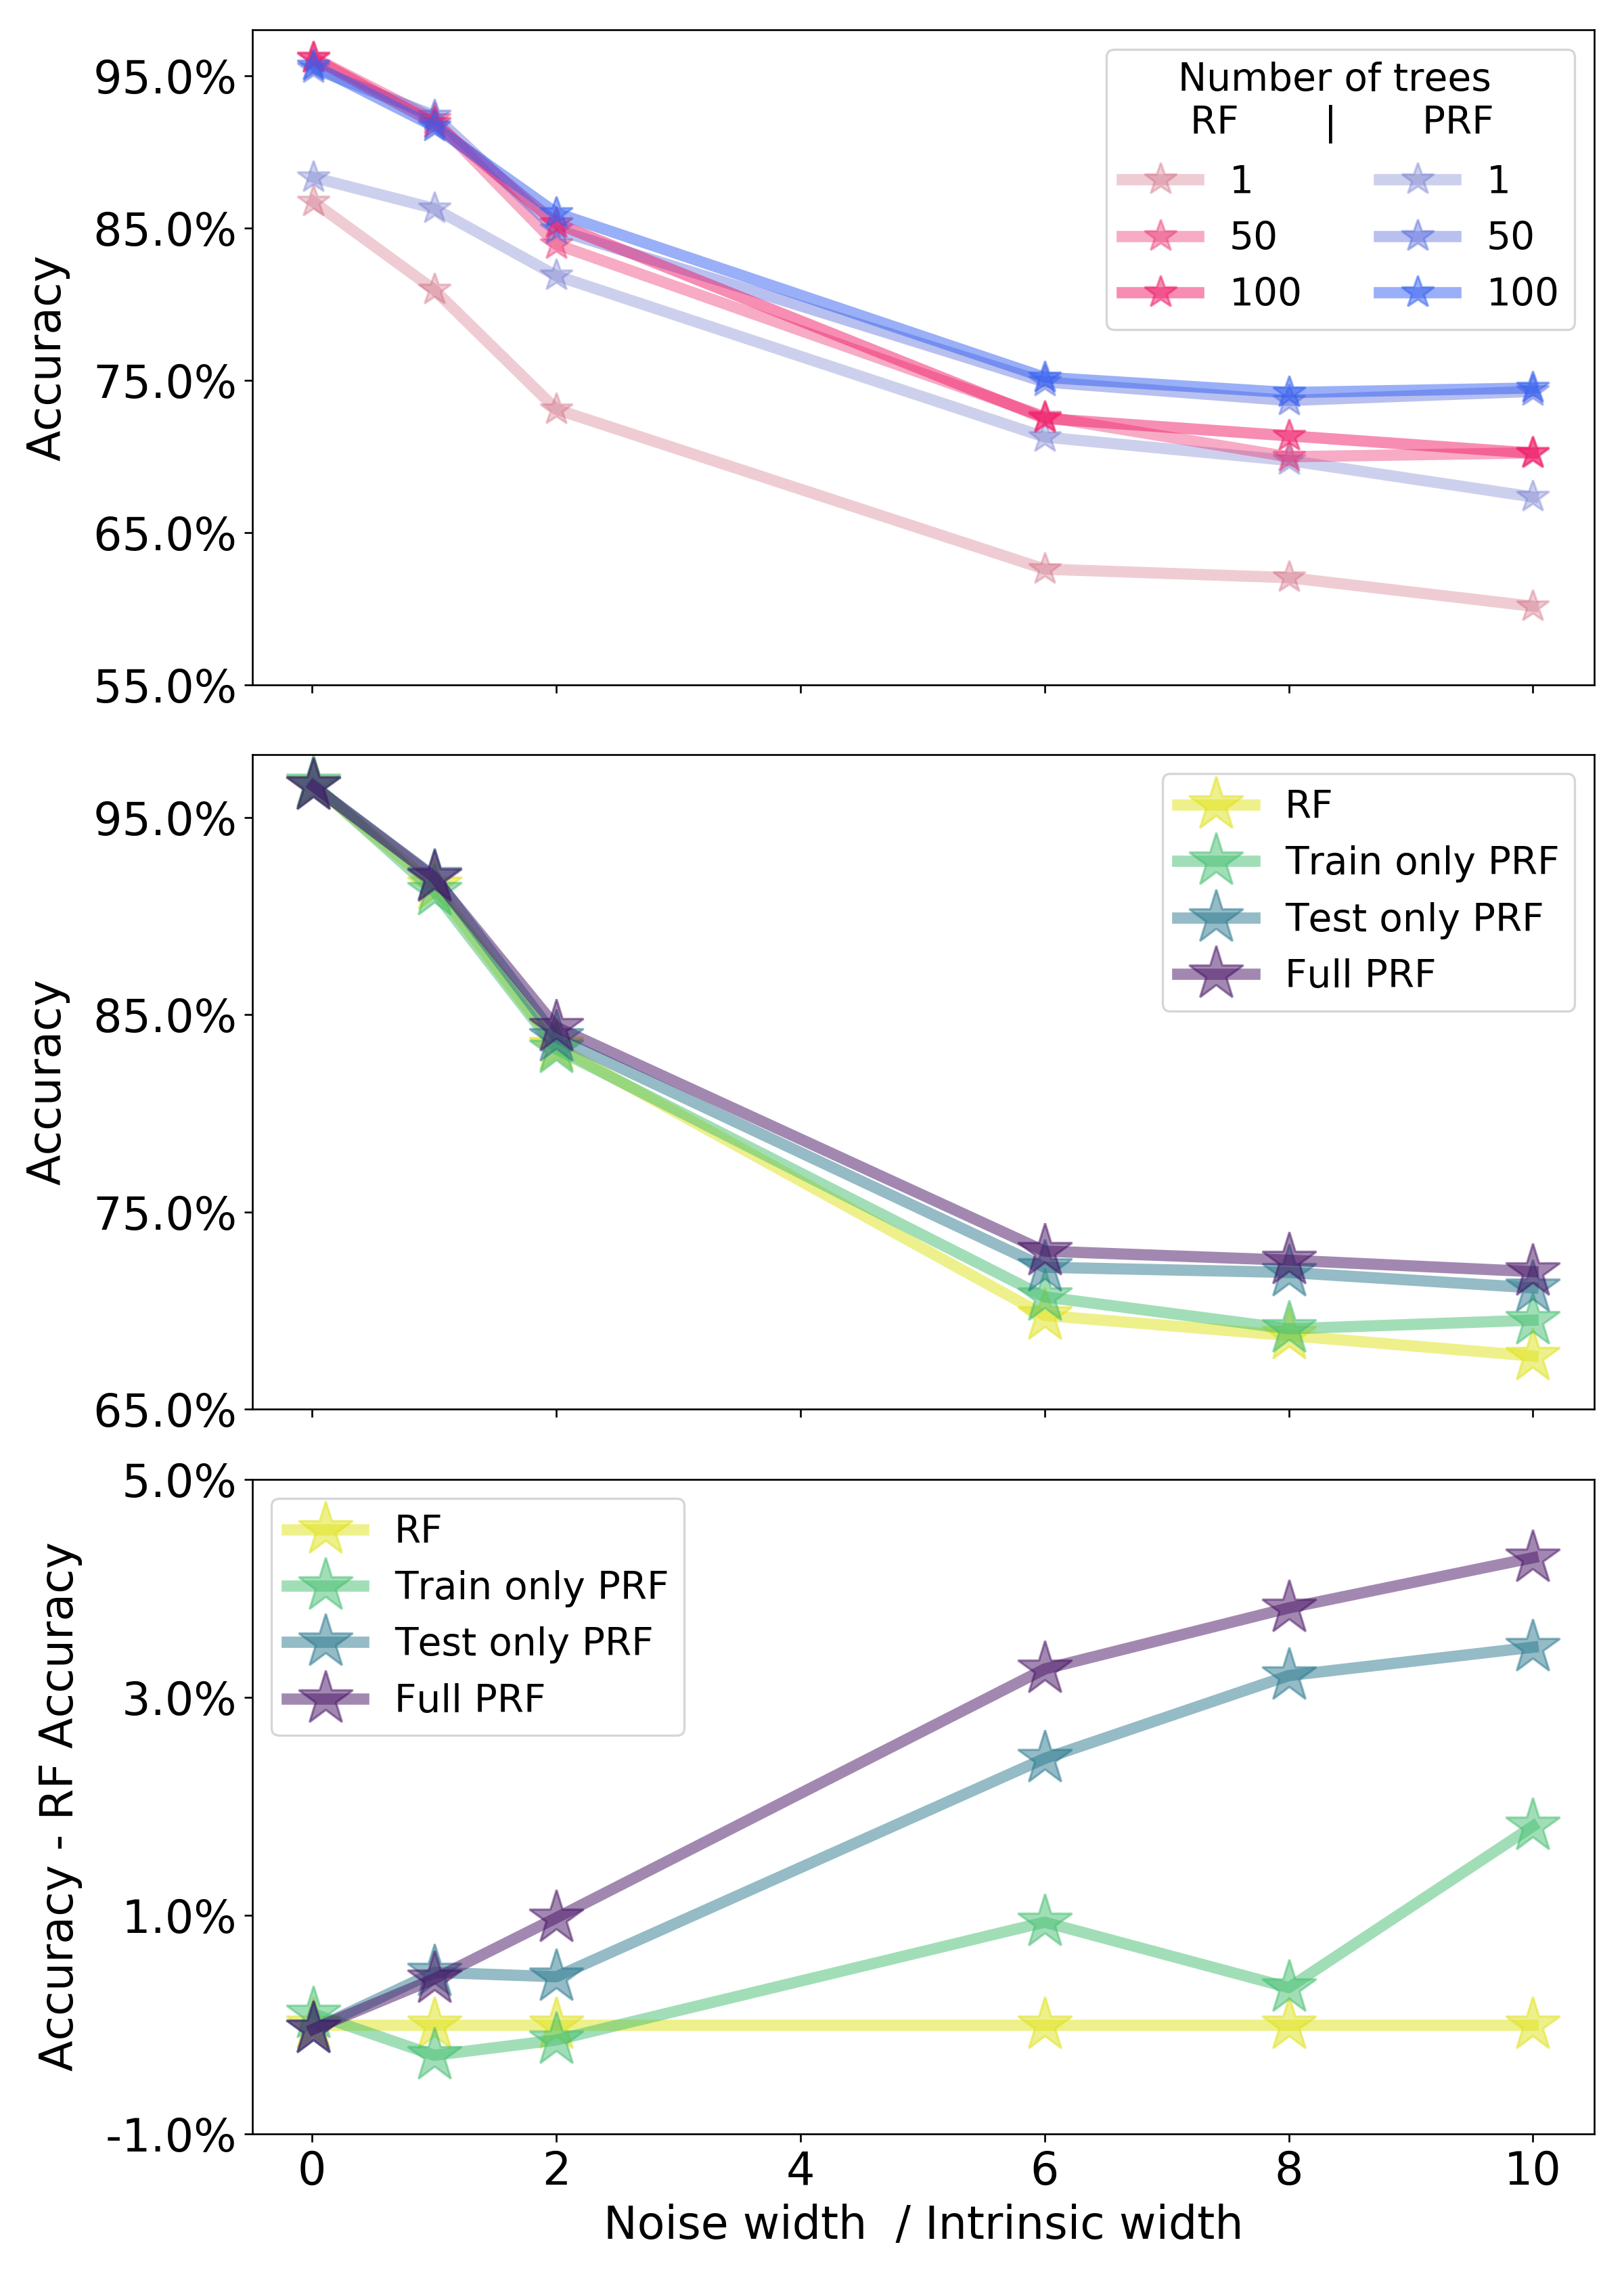

In [228]:
fig = plt.figure(figsize = (10,14))

lw = 5
ms = 15

colors_1 = ['#ca5670', '#eb2f6f', '#f01c69', '#ff0047']
colors_2 = ['#5c64c5', '#4e62da', '#3460f1', '#005eff']
legened_fontsize = 17
#############################################################################################
#############################################################################################
ax0 = plt.subplot(3, 1, 1)
#############################################################################################
#############################################################################################

alpha_arr = [ 0.3, 0.4, 0.5, 0.8]

n_tress_vec = [1,  50, 100]
for idx, n_trees in enumerate(n_tress_vec):
    path = 'results/paper/noise_in_features_G/n_trees_' + str(n_trees) +'_20_groups.npy'
    [scores_PRF, scores_RF, noise_in_features_vec] = numpy.load(path)
    noise_in_features_vecn = 0.6581623333333333*noise_in_features_vec
    plt.plot(noise_in_features_vec, scores_RF, label =  str(n_trees), linewidth = lw, 
             alpha = alpha_arr[idx], color = colors_1[idx],  marker='*', markersize = ms)

    plt.plot(noise_in_features_vec, scores_PRF, label =  str(n_trees), linewidth = lw, 
             alpha = alpha_arr[idx], color = colors_2[idx],  marker='*', markersize = ms)

    
#plt.plot(fbo, our_score, label = 'WRF', linewidth = lw, alpha = 0.8)
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
handles = numpy.concatenate([handles[::2], handles[1::2]])
labels = numpy.concatenate([labels[::2], labels[1::2]])
legend = plt.legend(handles, labels, fontsize = legened_fontsize, title = 'Number of trees \n RF       |       PRF',ncol=2,)
plt.setp(legend.get_title(),fontsize=legened_fontsize)

#legend_ = plt.legend(handles[::2], labels[::2],fontsize = 20,loc =4)
#plt.gca().add_artist(legend_)
#plt.legend(handles[1::2], labels[1::2],fontsize = 20,title='PRF')

plt.ylabel('Accuracy', fontsize = 20)
#plt.xlabel('Noise strength', fontsize = 20)
yticks = plt.gca().get_yticks()[::2]
yticks_p = ['{:>5}%'.format('%.1f' % (yt*100)) for yt in yticks]
plt.yticks(yticks, yticks_p, fontsize = 20)
plt.setp(ax0.get_xticklabels(), visible=False)



#############################################################################################
#############################################################################################
ax1 = plt.subplot(3, 1, 2, sharex=ax0)
#############################################################################################
#############################################################################################
from matplotlib.cm import get_cmap
cmap = get_cmap('viridis_r')
c1 = 0.05
c2 = 0.3
c3 = 0.6
c4 = 0.95
lw = 5
alpha = 0.5
ms = 25
path = 'results/paper/noise_in_features_G/train_only_test_only_n_trees50_20_groups.npy'  
[scores_PRF, scores_RF, scores_PRF_train_only, scores_PRF_test_only, noise_in_features_vec] = numpy.load(path)
noise_in_features_vecn = 0.6581623333333333*noise_in_features_vec
plt.plot(noise_in_features_vec, scores_RF, 
         lw = lw, alpha = alpha, label = 'RF', marker='*', markersize = ms, c = cmap(c1))
plt.plot(noise_in_features_vec, scores_PRF_train_only, 
         lw = lw, alpha = alpha, label = 'Train only PRF', marker='*', markersize = ms, c = cmap(c2))
plt.plot(noise_in_features_vec, scores_PRF_test_only, 
         lw = lw, alpha = alpha, label = 'Test only PRF', marker='*', markersize = ms, c = cmap(c3))
plt.plot(noise_in_features_vec, scores_PRF, 
         lw = lw, alpha = alpha, label = 'Full PRF', marker='*', markersize = ms, c = cmap(c4))
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend(fontsize = legened_fontsize)


plt.ylabel('Accuracy', fontsize = 20)
#plt.ylim([0.80,0.97])
#plt.xscale('log')

yticks = plt.gca().get_yticks()[::2]
yticks_p = ['{:>5}%'.format('%.1f' % (yt*100)) for yt in yticks]
plt.yticks(yticks, yticks_p, fontsize = 20)

#############################################################################################
#############################################################################################
ax2 = plt.subplot(3, 1, 3, sharex=ax1)
#############################################################################################
#############################################################################################

plt.plot(noise_in_features_vec, scores_RF-scores_RF, 
         lw = lw, alpha = alpha, label = 'RF', marker='*', markersize = ms, c = cmap(c1))
plt.plot(noise_in_features_vec, scores_PRF_train_only-scores_RF,
         lw = lw, alpha = alpha, label = 'Train only PRF', marker='*', markersize = ms, c = cmap(c2))
plt.plot(noise_in_features_vec, scores_PRF_test_only-scores_RF, 
         lw = lw, alpha = alpha, label = 'Test only PRF', marker='*', markersize = ms, c = cmap(c3))
plt.plot(noise_in_features_vec, scores_PRF-scores_RF, 
         lw = lw, alpha = alpha, label = 'Full PRF', marker='*', markersize = ms, c = cmap(c4))
plt.ylabel('Accuracy - RF Accuracy', fontsize = 20)
plt.legend(fontsize = legened_fontsize)
#plt.ylim([0.80,0.97])
#plt.xscale('log')
yticks = plt.gca().get_yticks()[::2]
yticks_p = ['{:>5}%'.format('%.1f' % (yt*100)) for yt in yticks]
plt.yticks(yticks, yticks_p, fontsize = 20)
plt.xlabel('Noise width  / Intrinsic width', fontsize = 20)
plt.xticks(fontsize = 20)
#plt.xlim([-0.5,15.5])
#fig.suptitle('Noise in features - white noise', fontsize = 20)

plt.tight_layout()
plt.show()

# Different noise train - test

<IPython.core.display.Javascript object>


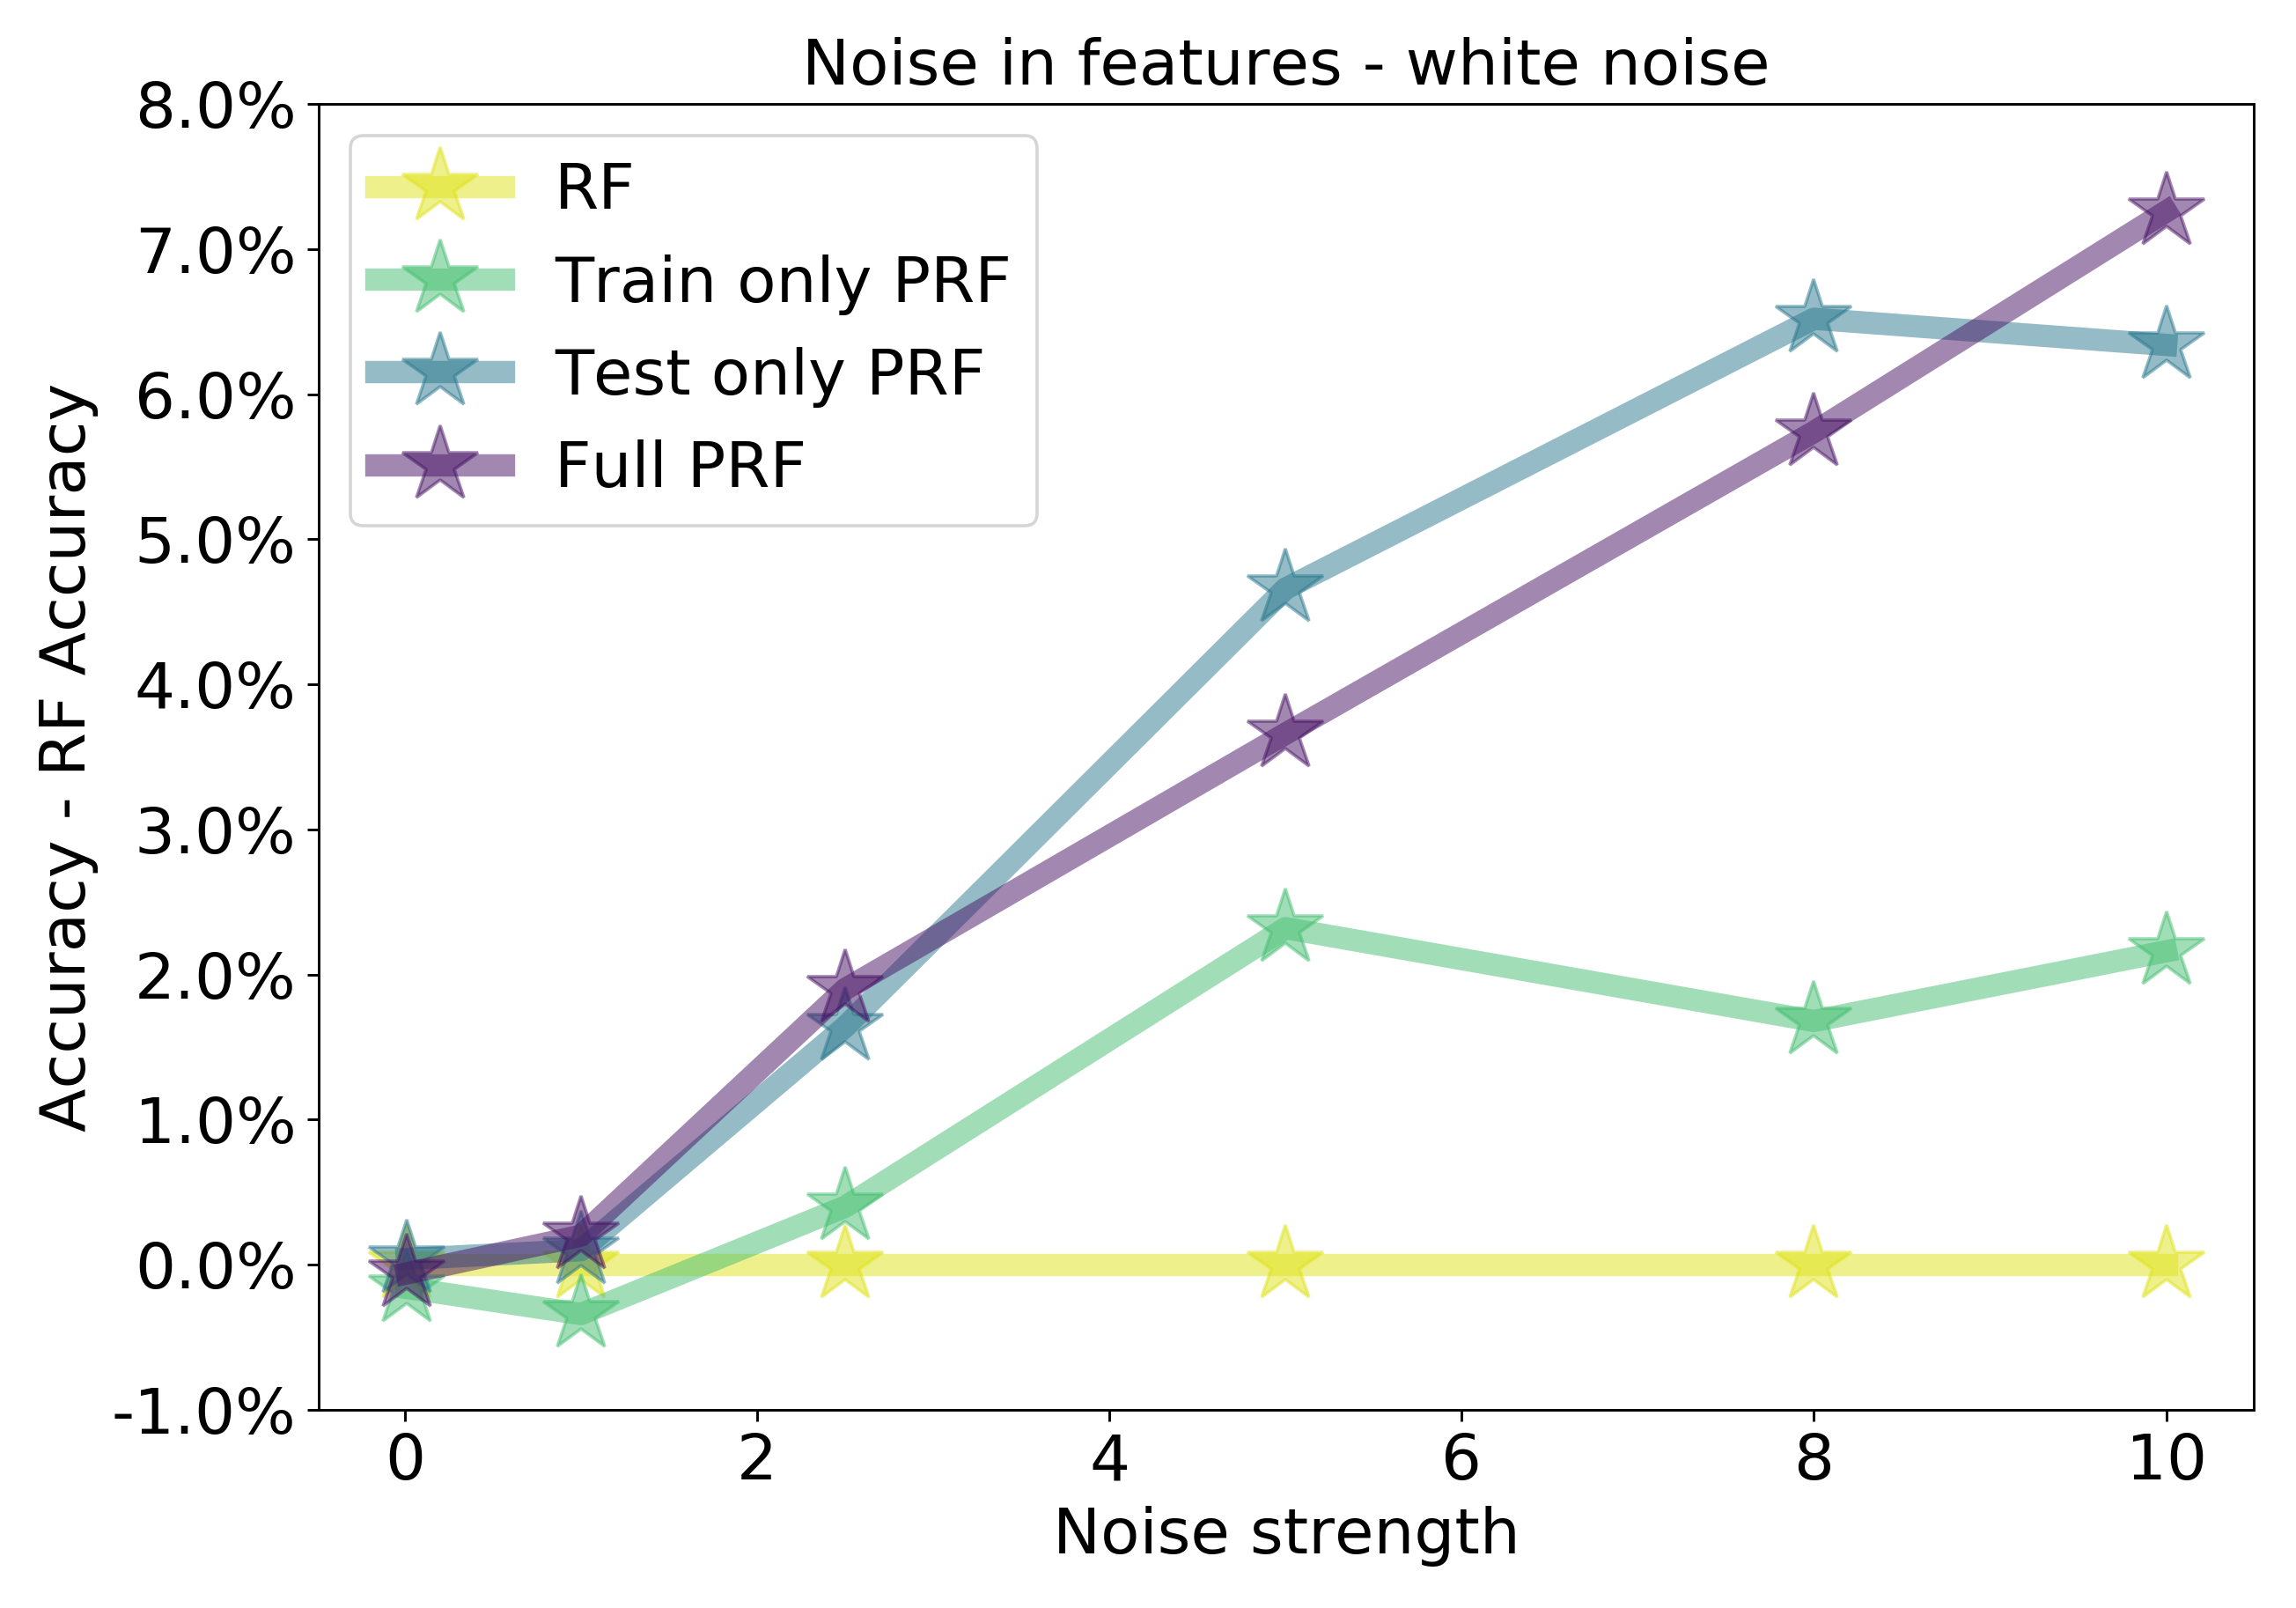

In [203]:
plt.figure(figsize = (10,7))
lw = 7
alpha = 0.5
ms = 25
path = 'results/paper/noise_in_features_G/train_only_test_only_n_trees50_diff_test_train_v0.npy'
[scores_PRF, scores_RF, scores_PRF_train_only, scores_PRF_test_only, noise_in_features_vec] = numpy.load(path)

plt.plot(noise_in_features_vec, scores_RF-scores_RF, lw = lw, alpha = alpha, label = 'RF', marker='*', markersize = ms, c = cmap(c1))
plt.plot(noise_in_features_vec, scores_PRF_train_only-scores_RF, lw = lw, alpha = alpha, label = 'Train only PRF', marker='*', markersize = ms, c = cmap(c2))
plt.plot(noise_in_features_vec, scores_PRF_test_only-scores_RF, lw = lw, alpha = alpha, label = 'Test only PRF', marker='*', markersize = ms, c = cmap(c3))
plt.plot(noise_in_features_vec, scores_PRF-scores_RF, lw = lw, alpha = alpha, label = 'Full PRF', marker='*', markersize = ms, c = cmap(c4))

plt.legend(fontsize = 20)
plt.xlabel('Noise strength', fontsize = 20)

plt.ylabel('Accuracy - RF Accuracy', fontsize = 20)
#plt.ylim([0.80,0.97])
#plt.xscale('log')
#xticks = plt.gca().get_xticks()[1::2]
#xticks_p = ['{}%'.format('%.1f' % (yt*100)) for yt in xticks]
#plt.xticks(xticks, xticks_p, fontsize = 20)
plt.xticks( fontsize = 20)

yticks = plt.gca().get_yticks()
yticks_p = ['{}%'.format('%.1f' % (yt*100)) for yt in yticks]
plt.yticks(yticks, yticks_p, fontsize = 20)
plt.title('Noise in features - white noise', fontsize = 20)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


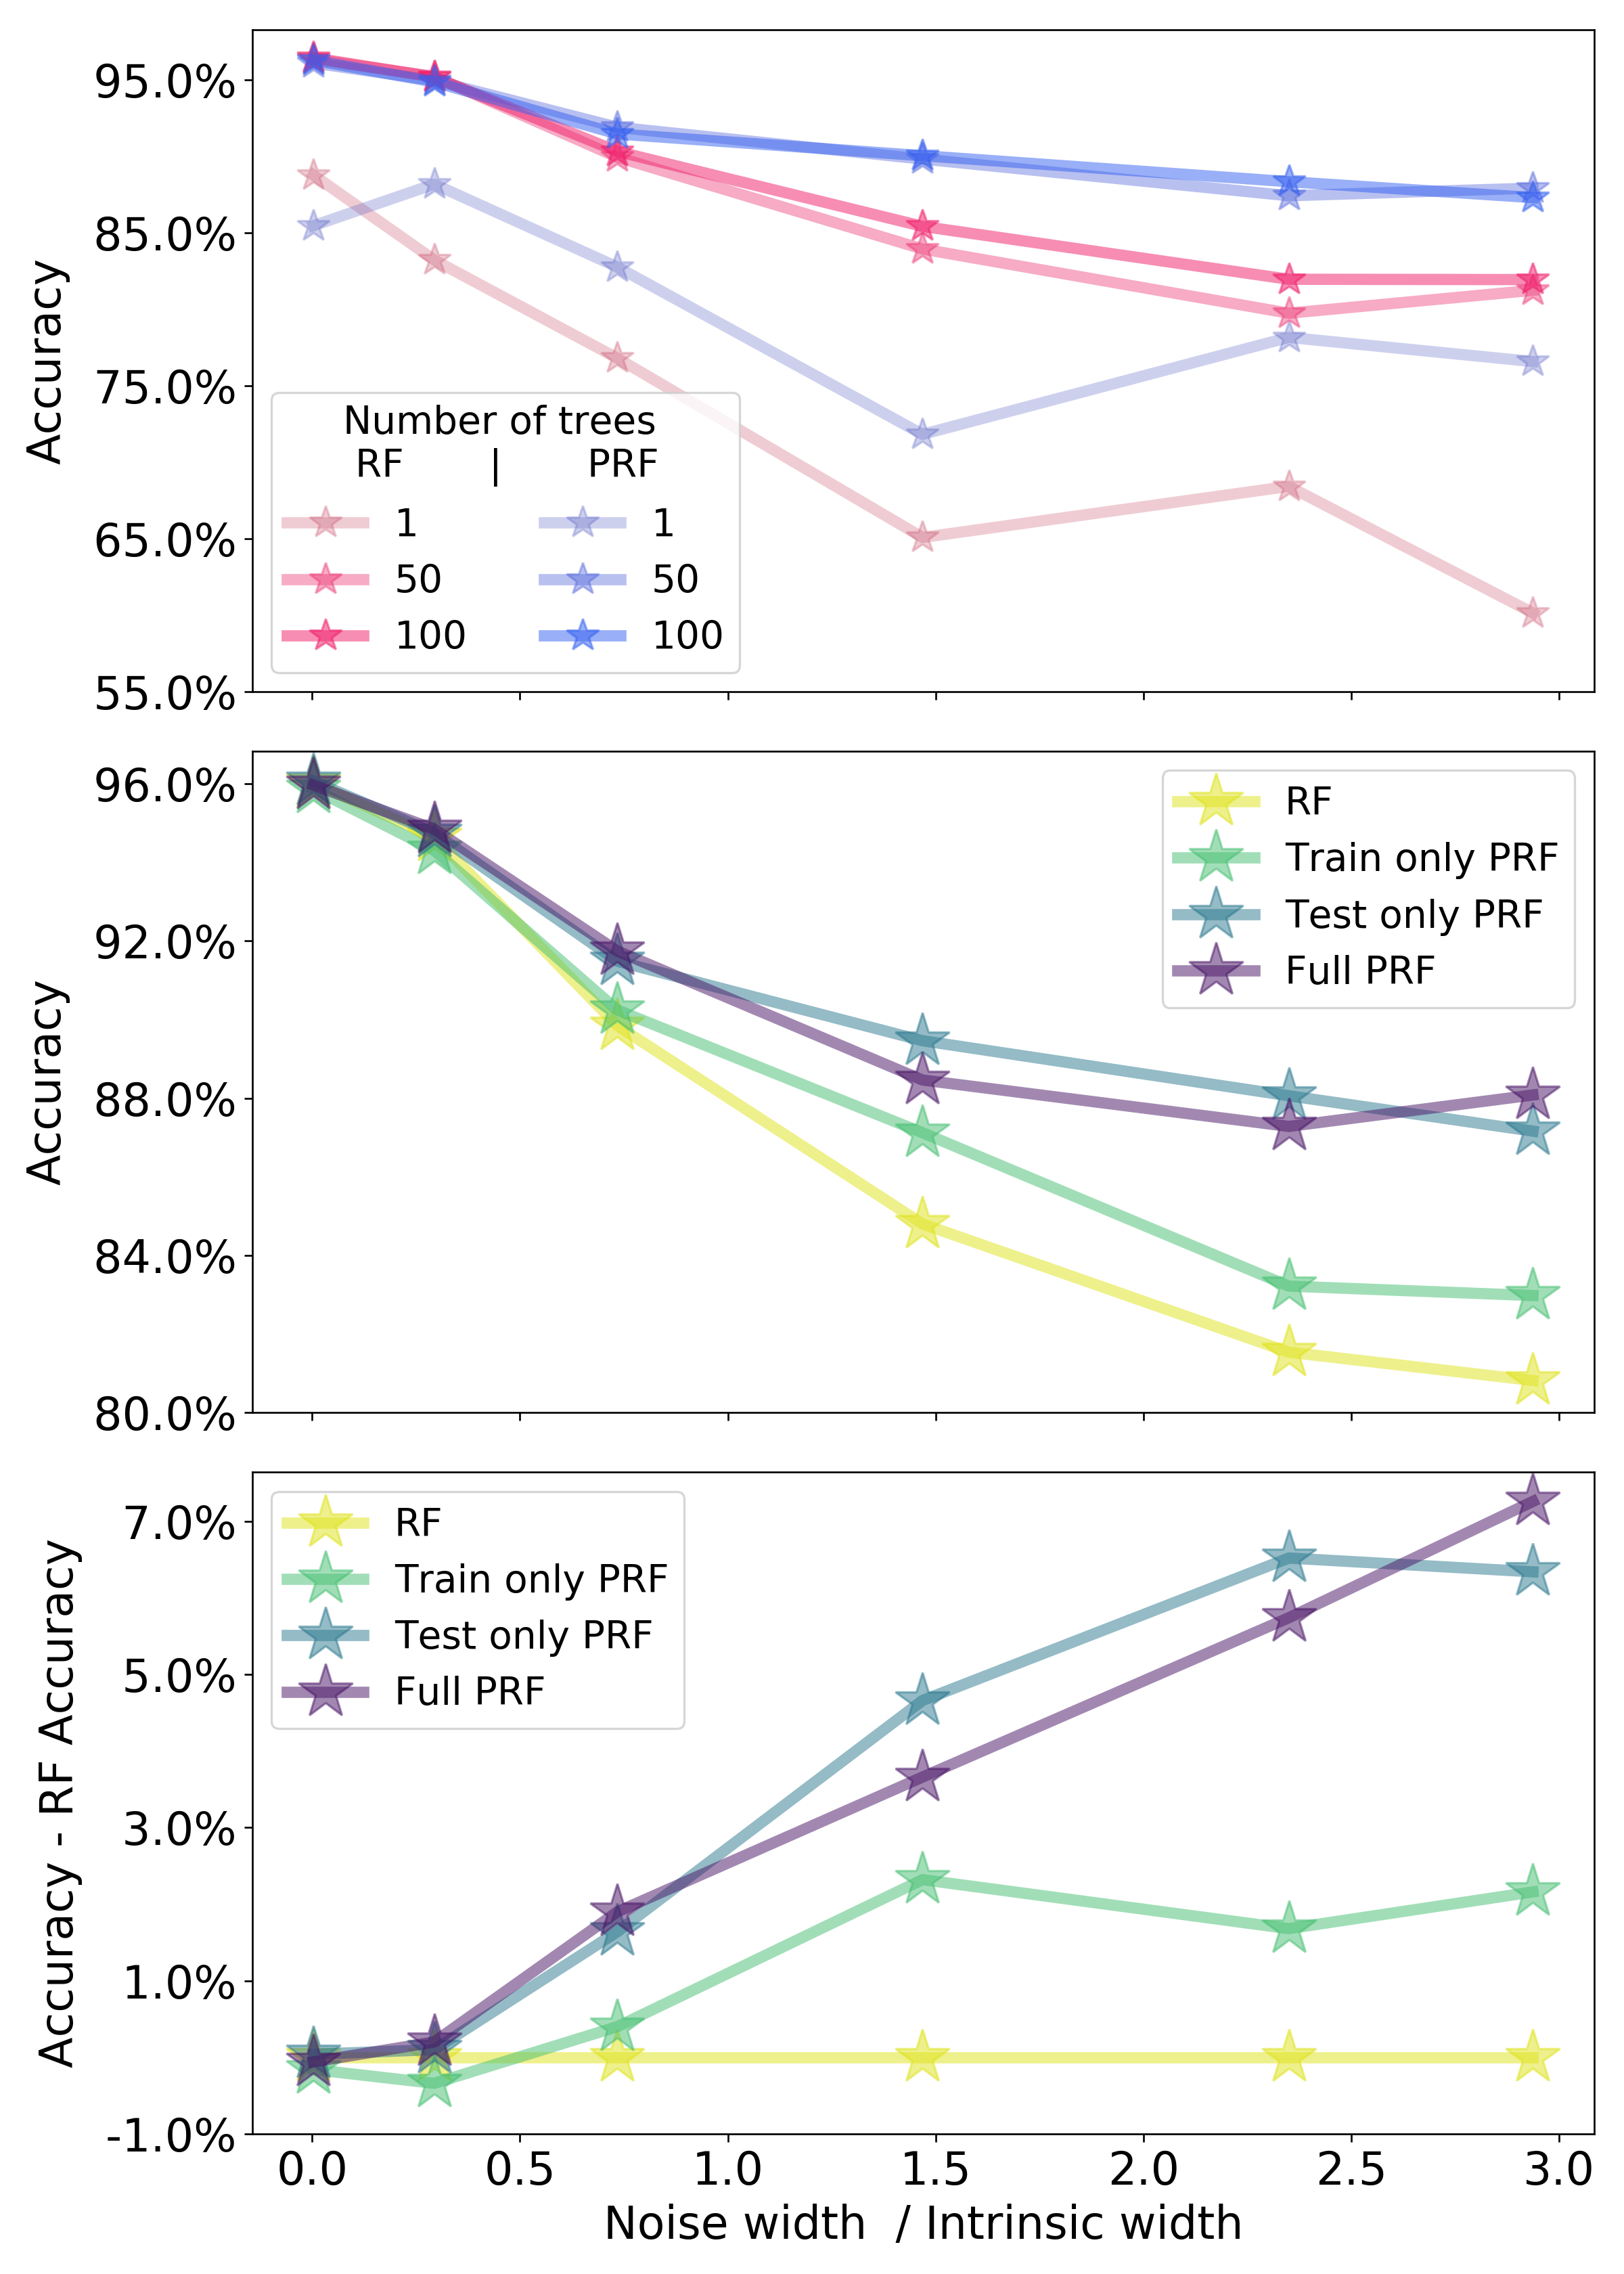

In [231]:
fig = plt.figure(figsize = (10,14))

lw = 5
ms = 15

colors_1 = ['#ca5670', '#eb2f6f', '#f01c69', '#ff0047']
colors_2 = ['#5c64c5', '#4e62da', '#3460f1', '#005eff']
legened_fontsize = 17
#############################################################################################
#############################################################################################
ax0 = plt.subplot(3, 1, 1)
#############################################################################################
#############################################################################################

alpha_arr = [ 0.3, 0.4, 0.5, 0.8]

n_tress_vec = [1,  50, 100]
for idx, n_trees in enumerate(n_tress_vec):
    path = 'results/paper/noise_in_features_G/n_trees_' + str(n_trees) +'_diff_test_train__.npy'
    [scores_PRF, scores_RF, noise_in_features_vec] = numpy.load(path)
    noise_in_features_vec = 0.2936900553378791*noise_in_features_vec
    plt.plot(noise_in_features_vec, scores_RF, label =  str(n_trees), linewidth = lw, 
             alpha = alpha_arr[idx], color = colors_1[idx],  marker='*', markersize = ms)

    plt.plot(noise_in_features_vec, scores_PRF, label =  str(n_trees), linewidth = lw, 
             alpha = alpha_arr[idx], color = colors_2[idx],  marker='*', markersize = ms)

    
#plt.plot(fbo, our_score, label = 'WRF', linewidth = lw, alpha = 0.8)
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
handles = numpy.concatenate([handles[::2], handles[1::2]])
labels = numpy.concatenate([labels[::2], labels[1::2]])
legend = plt.legend(handles, labels, fontsize = legened_fontsize, title = 'Number of trees \n RF       |       PRF',ncol=2,)
plt.setp(legend.get_title(),fontsize=legened_fontsize)

#legend_ = plt.legend(handles[::2], labels[::2],fontsize = 20,loc =4)
#plt.gca().add_artist(legend_)
#plt.legend(handles[1::2], labels[1::2],fontsize = 20,title='PRF')

plt.ylabel('Accuracy', fontsize = 20)
#plt.xlabel('Noise strength', fontsize = 20)
yticks = plt.gca().get_yticks()[::2]
yticks_p = ['{:>5}%'.format('%.1f' % (yt*100)) for yt in yticks]
plt.yticks(yticks, yticks_p, fontsize = 20)
plt.setp(ax0.get_xticklabels(), visible=False)



#############################################################################################
#############################################################################################
ax1 = plt.subplot(3, 1, 2, sharex=ax0)
#############################################################################################
#############################################################################################
from matplotlib.cm import get_cmap
cmap = get_cmap('viridis_r')
c1 = 0.05
c2 = 0.3
c3 = 0.6
c4 = 0.95
lw = 5
alpha = 0.5
ms = 25
path = 'results/paper/noise_in_features_G/train_only_test_only_n_trees50_diff_test_train_v0.npy'
[scores_PRF, scores_RF, scores_PRF_train_only, scores_PRF_test_only, noise_in_features_vec] = numpy.load(path)
noise_in_features_vec = 0.2936900553378791*noise_in_features_vec
plt.plot(noise_in_features_vec, scores_RF, 
         lw = lw, alpha = alpha, label = 'RF', marker='*', markersize = ms, c = cmap(c1))
plt.plot(noise_in_features_vec, scores_PRF_train_only, 
         lw = lw, alpha = alpha, label = 'Train only PRF', marker='*', markersize = ms, c = cmap(c2))
plt.plot(noise_in_features_vec, scores_PRF_test_only, 
         lw = lw, alpha = alpha, label = 'Test only PRF', marker='*', markersize = ms, c = cmap(c3))
plt.plot(noise_in_features_vec, scores_PRF, 
         lw = lw, alpha = alpha, label = 'Full PRF', marker='*', markersize = ms, c = cmap(c4))
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend(fontsize = legened_fontsize)


plt.ylabel('Accuracy', fontsize = 20)
#plt.ylim([0.80,0.97])
#plt.xscale('log')

yticks = plt.gca().get_yticks()[::2]
yticks_p = ['{:>5}%'.format('%.1f' % (yt*100)) for yt in yticks]
plt.yticks(yticks, yticks_p, fontsize = 20)

#############################################################################################
#############################################################################################
ax2 = plt.subplot(3, 1, 3, sharex=ax1)
#############################################################################################
#############################################################################################

plt.plot(noise_in_features_vec, scores_RF-scores_RF, 
         lw = lw, alpha = alpha, label = 'RF', marker='*', markersize = ms, c = cmap(c1))
plt.plot(noise_in_features_vec, scores_PRF_train_only-scores_RF,
         lw = lw, alpha = alpha, label = 'Train only PRF', marker='*', markersize = ms, c = cmap(c2))
plt.plot(noise_in_features_vec, scores_PRF_test_only-scores_RF, 
         lw = lw, alpha = alpha, label = 'Test only PRF', marker='*', markersize = ms, c = cmap(c3))
plt.plot(noise_in_features_vec, scores_PRF-scores_RF, 
         lw = lw, alpha = alpha, label = 'Full PRF', marker='*', markersize = ms, c = cmap(c4))
plt.ylabel('Accuracy - RF Accuracy', fontsize = 20)
plt.legend(fontsize = legened_fontsize)
#plt.ylim([0.80,0.97])
#plt.xscale('log')
yticks = plt.gca().get_yticks()[::2]
yticks_p = ['{:>5}%'.format('%.1f' % (yt*100)) for yt in yticks]
plt.yticks(yticks, yticks_p, fontsize = 20)
plt.xlabel('Noise strength', fontsize = 20)
plt.xticks(fontsize = 20)
#plt.xlim([-0.5,15.5])
plt.xlabel('Noise width  / Intrinsic width', fontsize = 20)

plt.tight_layout()
plt.show()

# Keep proba

In [122]:
path = 'results/paper/keep_proba/n_trees_1.npy' 
path = 'results/paper/keep_proba/n_trees_10.npy' 
[rf_socres, prf_scores, keep_proba_vec] = numpy.load(path)

In [130]:
plt.figure(figsize = (10,7))


lw = 7
alpha = 0.5
ms = 20
plt.plot(keep_proba_vec, prf_scores, lw = lw, alpha = alpha, label = 'PRF', marker='*', markersize = ms)
plt.plot(keep_proba_vec, rf_socres, lw = lw, alpha = alpha, label = 'RF', )



plt.legend(fontsize = 20)
plt.xlabel('PRF probability threshold', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
#plt.ylim([0.80,0.97])
plt.xscale('log')
plt.xticks(fontsize = 20)
yticks = plt.gca().get_yticks()
yticks_p = ['{:>5}%'.format('%.1f' % (yt*100)) for yt in yticks]
plt.yticks(yticks, yticks_p, fontsize = 20)
plt.xticks([ 0.00001, 0.0001,0.001, 0.01, 0.1,  1])
#plt.title('Object groups noise, 1 tree, 10K objects', fontsize = 12)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

# Runtime

In [170]:
rf = numpy.array([90.8, 151, 443, 839, 5890])/1000
prf_pth_01 = numpy.array([ 207, 861, 3530, 7240, 67000])/1000
prf_pth_005 = numpy.array([ 186, 1290, 5550, 11300, 91000])/1000
prf_pth_1 = numpy.array([ 62.4, 130, 454, 795, 8600])/1000
prf_pth_05 = numpy.array([ 94, 306, 1080, 2060, 21800])/1000
n_objects = [100,1000,5000,10000, 100000]

In [176]:
%matplotlib notebook

In [189]:
plt.figure(figsize = (10,7))
from matplotlib.cm import get_cmap
cmap = get_cmap('plasma_r')

lw = 7
alpha = 0.5
ms = 20
plt.plot(n_objects, prf_pth_005, lw = lw, alpha = 0.9, 
         label = 'PRF with $P_{th} = 0.05$', marker='*', markersize = ms, c = cmap(0.05))
plt.plot(n_objects, prf_pth_01, lw = lw, alpha = 0.7, 
         label = 'PRF with $P_{th} = 0.1$', marker='*', markersize = ms, c = cmap(0.2))
plt.plot(n_objects, prf_pth_05, lw = lw, alpha = alpha, 
         label = 'PRF with $P_{th} = 0.5$', marker='*', markersize = ms, c = cmap(0.4))
plt.plot(n_objects, prf_pth_1, lw = lw, alpha = alpha, 
         label = 'PRF with $P_{th} = 1$', marker='*', markersize = ms, c = cmap(0.7))
plt.plot(n_objects, rf, '--', lw = lw, alpha = alpha, label = 'RF', marker='*', markersize = ms, )



lgnd = plt.legend(fontsize = 20)
lgnd.legendHandles[1].set_markersize(1)

plt.xlabel('Number of objects', fontsize = 20)
plt.ylabel('Runtime [s]', fontsize = 20)
#plt.ylim([0.80,0.97])
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#yticks = plt.gca().get_yticks()
#yticks_p = ['{:>5}%'.format('%.1f' % (yt*100)) for yt in yticks]
#plt.yticks(yticks, yticks_p, fontsize = 20)
#plt.xticks([ 0.00001, 0.0001,0.001, 0.01, 0.1,  1])
#plt.title('Object groups noise, 1 tree, 10K objects', fontsize = 12)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [184]:
for h in lgnd.legendHandles:
    print(h)

Line2D(PRF with $P_{th} = 0.05$)
Line2D(PRF with $P_{th} = 0.1$)
Line2D(PRF with $P_{th} = 0.5$)
Line2D(PRF with $P_{th} = 1$)
Line2D(RF)


In [186]:
h = lgnd.legendHandles[0]

In [ ]:
h.set_markersize(100)

# Noise matrix

In [233]:
import noise_data
nof_features = 15
nof_objects_tot = 1000
sigma_mat = noise_data.snp_noise(nof_objects_tot, nof_features)
#cut = 0.5
#sigma_mat[sigma_mat > cut] = 1
#sigma_mat[sigma_mat < cut] = 0

<IPython.core.display.Javascript object>


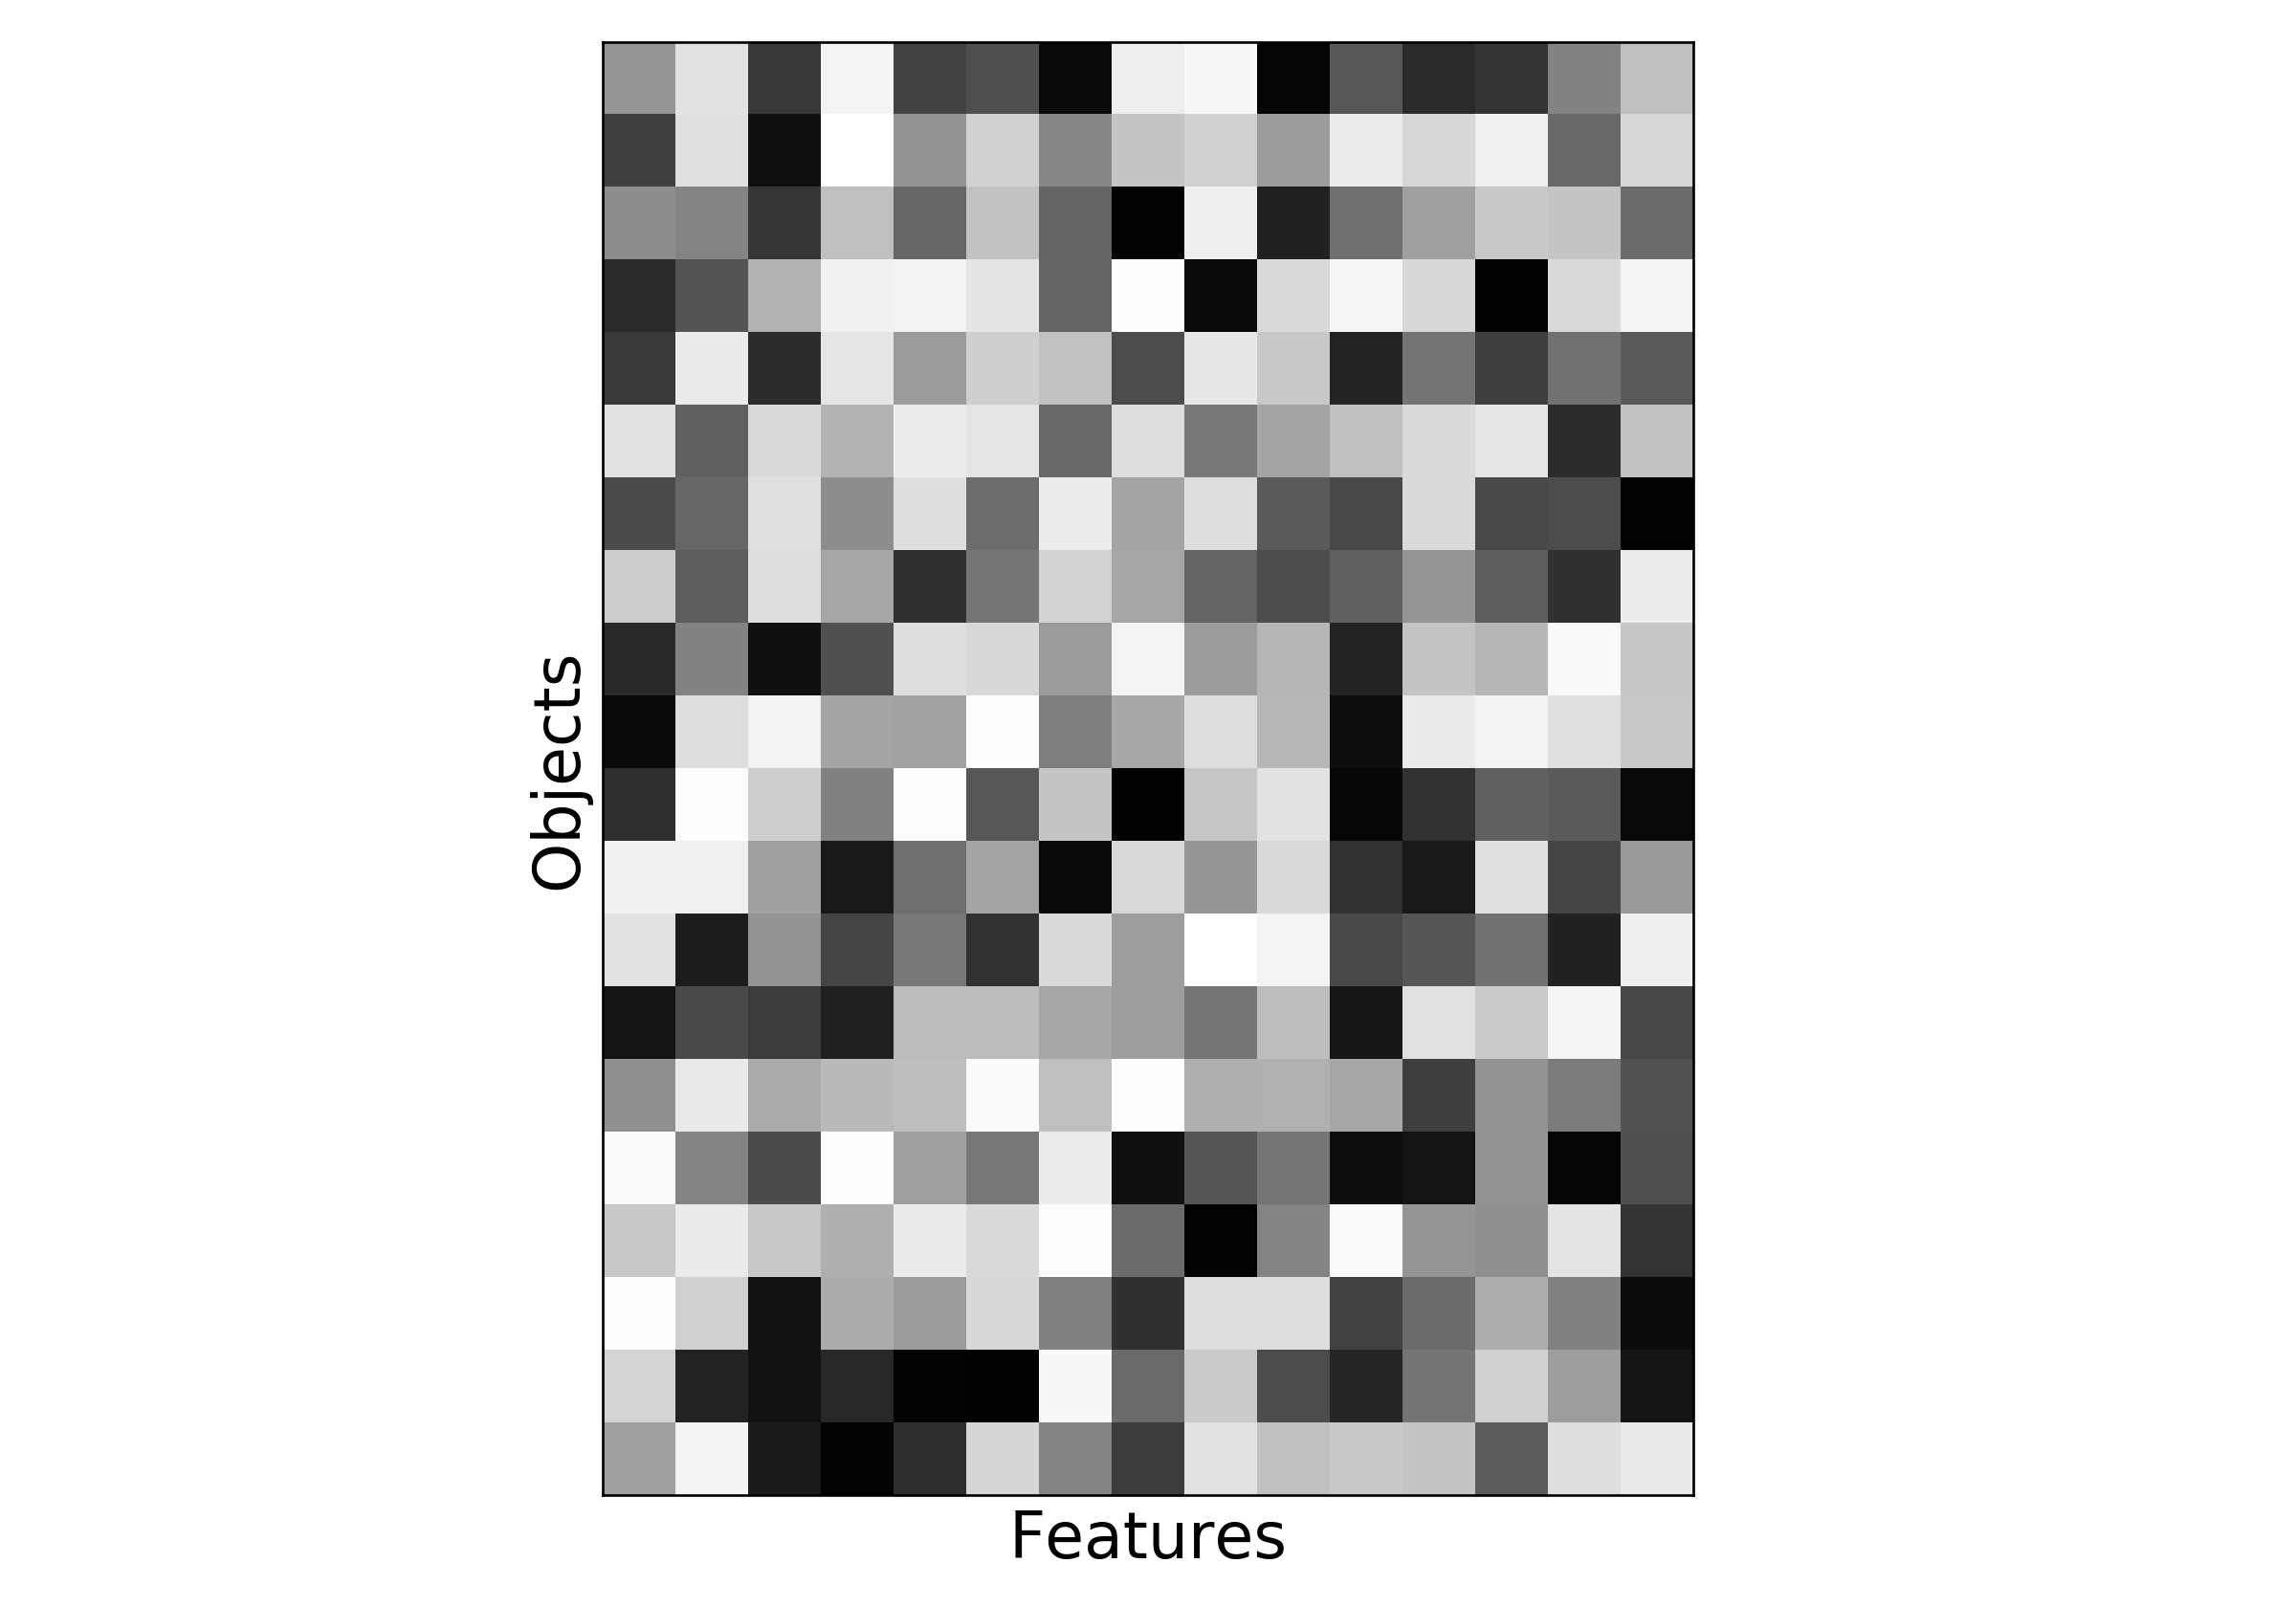

In [235]:
plt.figure(figsize = (10,7))
plt.imshow(sigma_mat[:20], cmap = 'Greys')
plt.xticks([])
plt.yticks([])
plt.ylabel('Objects', fontsize = 20)
plt.xlabel('Features', fontsize = 20)
#plt.title('Noise matrix', fontsize = 20)
#cb = plt.colorbar()
#cb.set_label('Noise', fontsize = 20)
#cb.set_ticks([0.9])
#cb.set_ticklabels(['High'])
plt.tight_layout()
plt.show()

In [237]:
import noise_data
nof_features = 15
nof_objects_tot = 1000
sigma_mat = noise_data.random_random_noise(nof_objects_tot, nof_features)


In [ ]:
plt.figure(figsize = (10,7))
plt.imshow(sigma_mat[:20], cmap = 'Greys')
plt.xticks([])
plt.yticks([])
plt.ylabel('Objects', fontsize = 20)
plt.xlabel('Features', fontsize = 20)
#plt.title('Noise matrix', fontsize = 20)
cb = plt.colorbar()
cb.set_label('Noise strength', fontsize = 20)
cb.set_ticks([0.1, 0.7])
cb.set_ticklabels(['Low','High'])
cb.ax.ticklabel_format(fontsize = 20)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [219]:
import noise_data
nof_features = 15
nof_objects_tot = 10000
sigma_mat = noise_data.bad_features_per_object_group_noise(nof_objects_tot, nof_features)


<IPython.core.display.Javascript object>


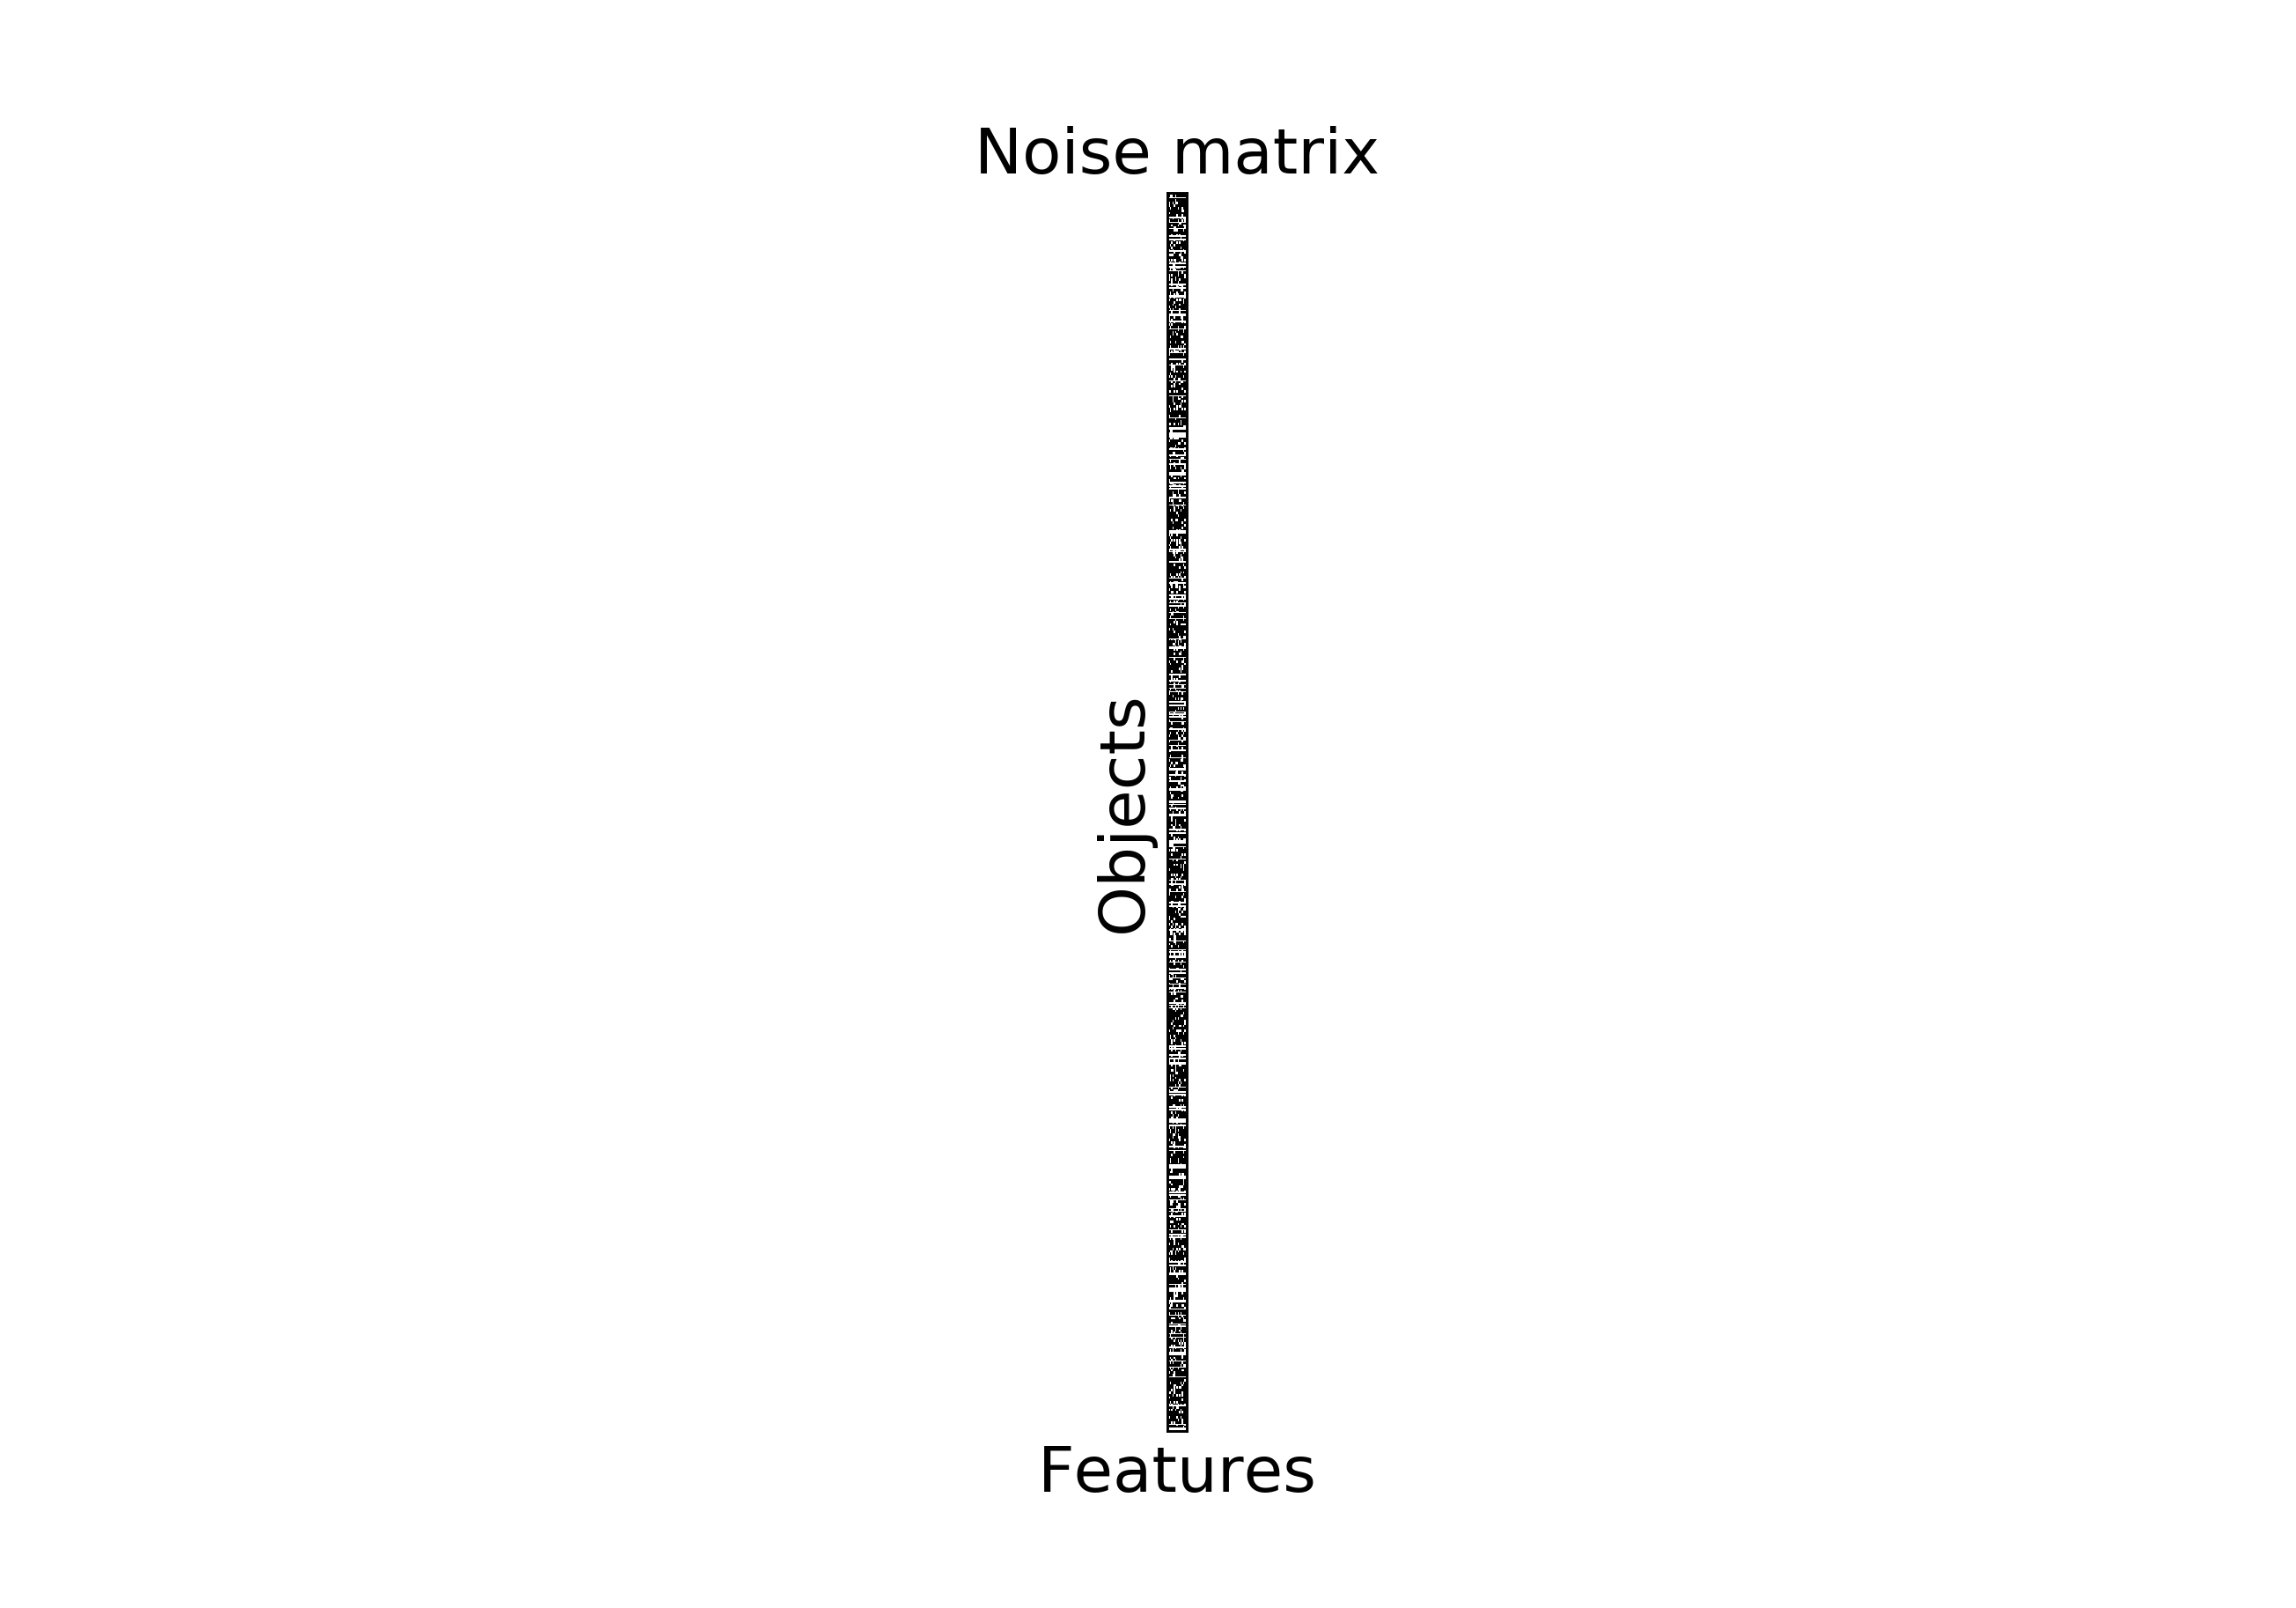

In [222]:
plt.figure(figsize = (10,7))
plt.imshow(sigma_mat[::10], cmap = 'Greys')
plt.xticks([])
plt.yticks([])
plt.ylabel('Objects', fontsize = 20)
plt.xlabel('Features', fontsize = 20)
plt.title('Noise matrix', fontsize = 20)
#cb = plt.colorbar()
#cb.set_label('Noise', fontsize = 20)
#cb.set_ticks([0.9])
#cb.set_ticklabels(['High'])
plt.show()